<a href="https://colab.research.google.com/github/vinay24jun/-EDA-Play-Store-Reviews-Analysis/blob/main/Bike_Shairing_Demond_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**    - Bike Sharing Demond Predection



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**  Vinay Chaudhary
##### **Team Member 2 -**  Anand Kumar
 

# **Summary of Project -**

Bike sharing systems means that renting bicycles in which there is a process of obtaining membership, rental, and bike return is automatically. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. 

Currently, there are over 500 bike-sharing programs around the world.
Several bike/scooter rides sharing facilities (e.g., Bird, Capital Bikeshare, Citi Bike) have started up lately especially in metropolitan cities like San Francisco, New York, Chicago and Los Angeles, and one of the most important problem from a business point of view is to predict the bike demand on any particular day.

While having excess bikes results in wastage of resource (both with respect to bike maintenance and the land/bike stand required for parking and security), having fewer bikes leads to revenue loss (ranging from a short term loss due to missing out on immediate customers to potential longer term loss due to loss in future customer base), Thus, having an estimate on the demands would enable efficient functioning of these companies.

The goal of this project is to combine the historical bike usage patterns with the weather data to forecast bike rental demand. The data set consists of hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month




To build a machine learning model on this data, we first gathered and clean the data, and handled the null values, then we performed indepth EDA with visuals and we gathered many insights from our EDA. Then further on, we did data preprocessing.

Then we split it into training and testing sets. Next, we choose a machine learning algorithm and use the training data to train the model. Finally, you we evaluated the model's performance on the testing data to see how well it is able to predict sales.

There are many different machine learning algorithms that we used for this task, including Linear Regression, Decision trees, Random Forests, Light GBM and XGBOOST. It is also possible to use more advanced techniques, such as deep learning, to build a model on Bike Shairing Demond Prediction data.

Overall, while building a machine learning model on Bike Shairing Demond Prediction data we applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task, but with the right approach, we were able to create a model that can accurately predict sales for a retail store chain.



# **GitHub Link -**

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

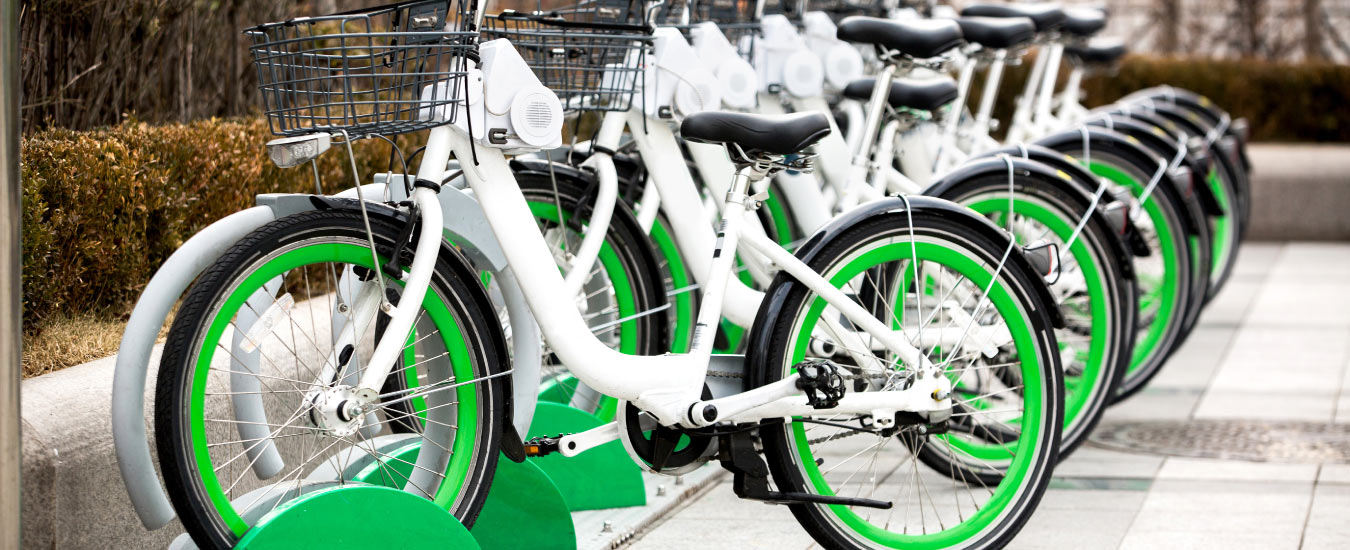

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# ML eveluation library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


# ML Model implementation library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from xgboost import XGBRegressor
from sklearn.tree import plot_tree

#figure plot library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = ('/content/drive/MyDrive/Bike Sharing Predection/SeoulBikeData.csv')
dataset = pd.read_csv(path, encoding = "ISO-8859-1")

### Dataset First View

In [ ]:
# View top 5 dataset
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# View last 5 dataset
dataset.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Number of (rows, columns) are',dataset.shape)

Number of (rows, columns) are (8760, 14)


###  <b> Dataset Information :</b>

*   Date : year-month-day

*   Rented Bike Count : Count of bikes rented at each hour

*   Hour : Hour of the day

*   Temperature(°C) : Temperature in Celsius

*   Humidity(%) : Relative Humidity%

*   Wind speed (m/s) : Average Speed of the wind(m/s)

*   Visibility (10m) : 10meter 

*   Dew point temperature(°C) : Celsius

*   Solar Radiation (MJ/m2) : Megajoules/meter*meter

*   Rainfall(mm) : millimetre

*   Snowfall (cm) : centimeter

*   Seasons : Winter, Spring, Summer, Autumn

*   Holiday : Holiday/No holiday

*   Functioning Day : NoFunc(Non Functional Hours), Fun(Functional hours)





---







In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

there is no duplicate value persent into it.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can say that there is no null value persent in it.

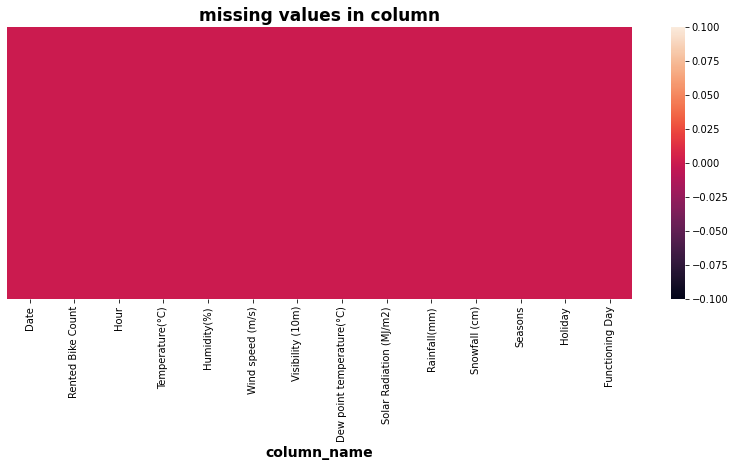

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(dataset.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

Till now we get to know the following points about our dataset:
1. **'SeoulBikeData'** is having **8760 rows and 14 columns** and does not have any null value.

2. There are **no duplicate** values present in both the datasets.

3. There is no null value persent in the dataset.

4. There are total 4 **categorical features** in 'SeoulBikeData' dataset namely : Date, Season, Holiday and Functioning Day.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Variables Description 

Answer : We have handled all the null values in our dataset, and created new variables using date column.

In [ ]:
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
dataset.nunique()  

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"The Unique Values of', {i}, 'are:", dataset[i].unique())
  print()
  print('--'*50)

The Unique Values of', Date, 'are: ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '

## **3. Data Wrangling** 
Data wrangling is the process of removing errors and combining complex data sets to make them more accessible and easier to analyze. Due to the rapid expansion of the amount of data and data sources available today, storing and organizing large quantities of data for analysis is becoming increasingly necessary.

### Data Wrangling Code

In [ ]:
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Write your code to make your dataset analysis ready.
dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

# We dont want each day name so we converted it into binary class as Weekdays = 0 & Weekend 1.

dataset['weekdays_weekend']=dataset['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.
dataset=dataset.drop(columns=['Date','day','year'],axis=1)

In [ ]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [ ]:
# Numeric Features

numeric_features= dataset.select_dtypes(exclude='object')
numeric_features

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  month  weekdays_weekend  
0              0.0            0.0      1                 0  
1              0.0            0.0      1                 0  
2              0.0            0.0      1                 0  
3              0.0            0.0      1                 0  
4              0.0            0.0      1                 0  
...            ...            ...    ...               ...  
8755           0.0            0.0     11                 0  
8756           0.0            0.0     11                 0  
8757           0.0            0.0     11                 0  
8758           0.0            0.0     11                 0  
8759           0.0            0.0     11                 0  

[8760 rows x 12 columns]

### What all manipulations have you done and insights you found?

**Answer :** Here we have deleted Data column which contain data/Month/Year from the dataset and add a new column that is Month to make easy to find the insights.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 Mean Skew Count of dataset**

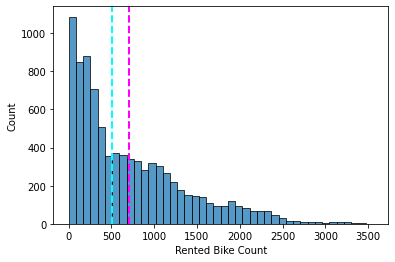

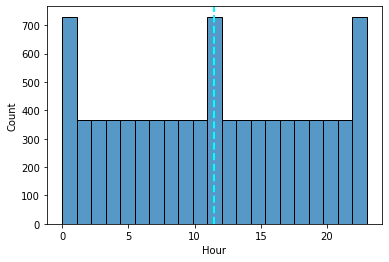

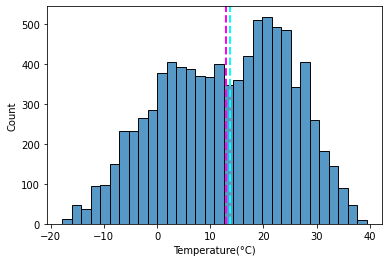

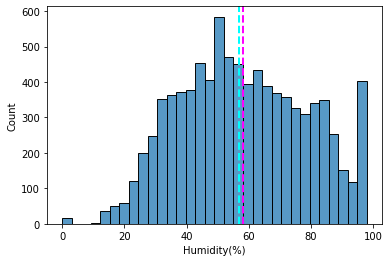

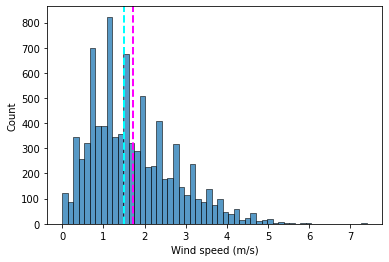

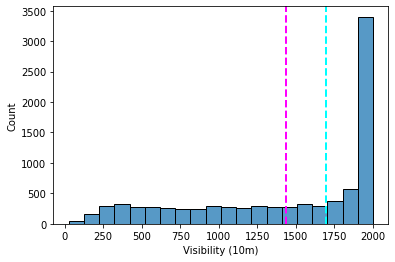

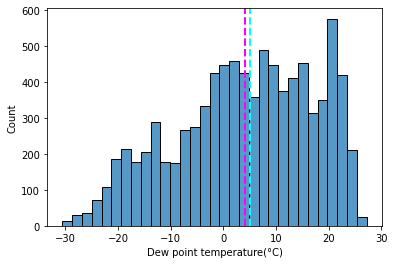

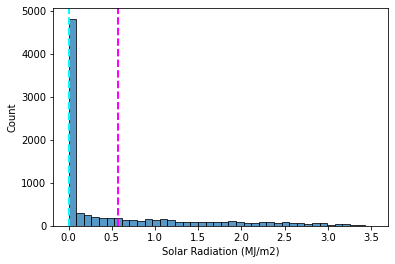

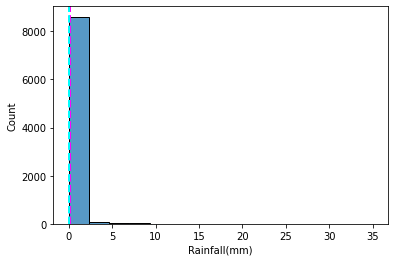

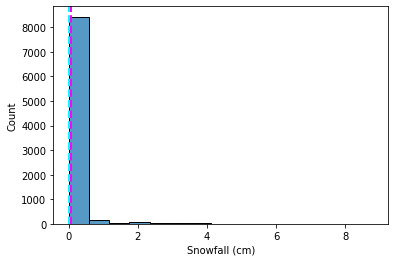

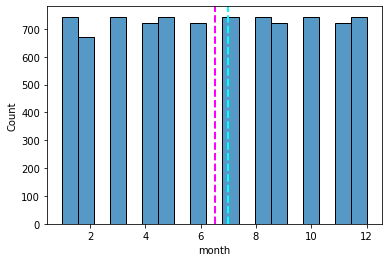

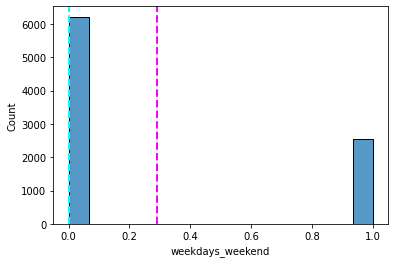

In [ ]:
# Chart - 1 visualization code
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(dataset[col])
  plt.axvline(dataset[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(dataset[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

We have pick this histogrtam chart to find the count the number of the data and mean of that data column to analyse.

The features which are skewed, their mean and the median are also skewed.




#### **Chart - 2 Regresion Plot of each column of dataset v/s Rented bike column**

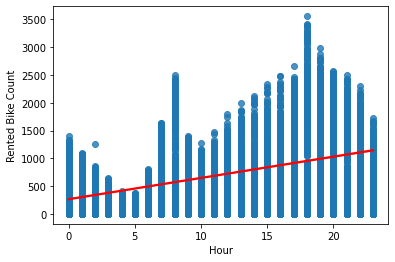

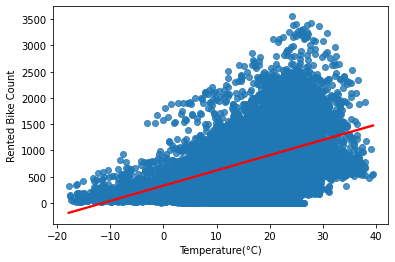

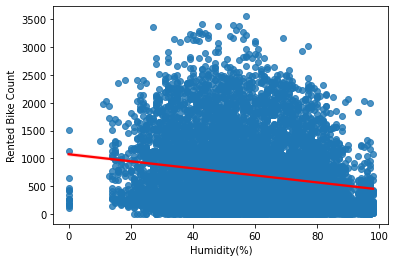

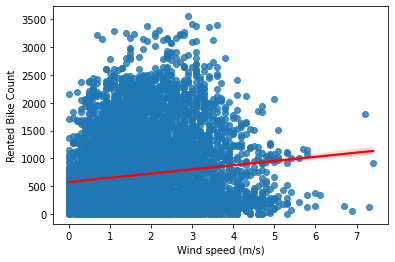

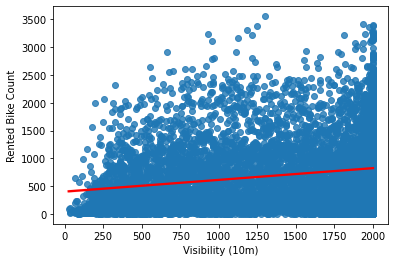

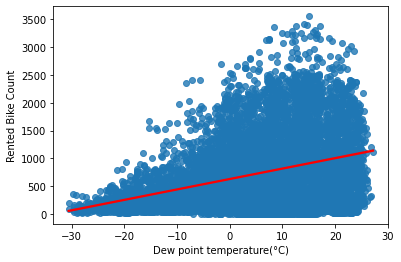

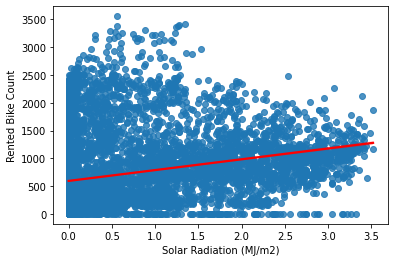

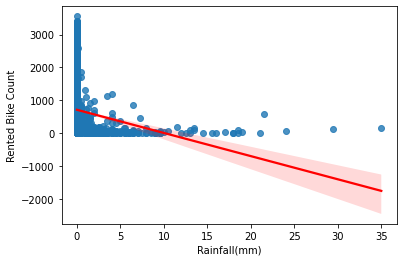

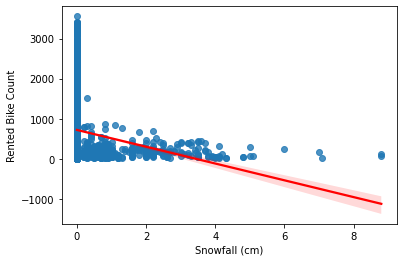

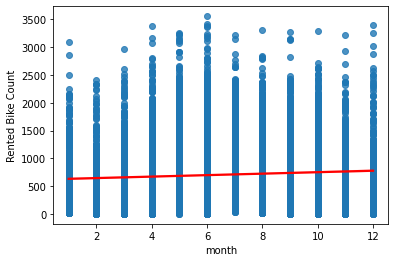

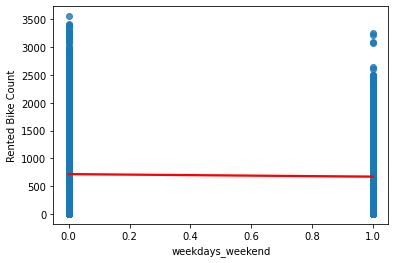

In [ ]:
# Chart - 2 visualization code
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=dataset[col],y=dataset["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

##### 1. Why did you pick the specific chart?

**Answer :** We have pick up this chart to find the relationship between dependent and independent variable and find the best fit line.


##### 2. What is/are the insight(s) found from the chart?

**Answer :** From this chart we can say that the line drawn shows the relationship between dependent and independent variable in this column some of the independent variable are directly proportional, inversely proportional and some are neither directly nor inversely.

Directly Proportiooinal variable are :-    

*   Hour

*   Temperature(°C)

*   Wind speed

*   Dew point temperature

*   Solar Radiation

Inversely Proportional variable are

*   Humidity

*   Rainfall

*   Snowfall


Neither Directly nor Inversely Proportional

*   Month 

*   weekdays_weekend 

*   Visibility


Observations :

*   The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.


*   Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.



#### **Chart - 3 Season Vs Ranted Bike Count**

<Figure size 4000x3000 with 0 Axes>

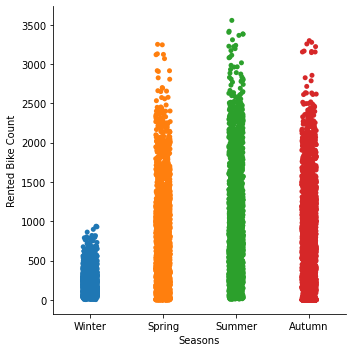

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(20,15),dpi=200)
sns.catplot(x ='Seasons', y = 'Rented Bike Count' , data = dataset)
plt.show()

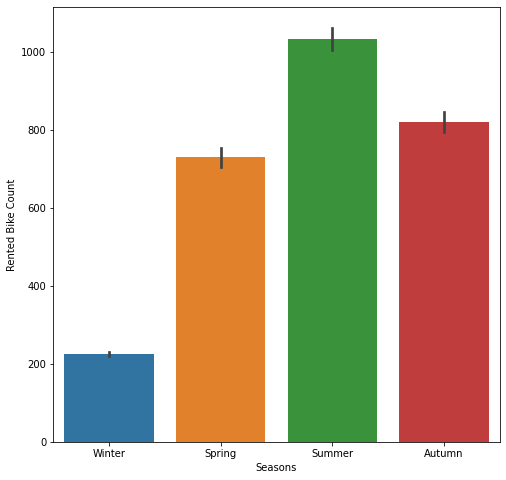

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8,8))
sns.barplot(x ='Seasons', y = 'Rented Bike Count' , data = dataset)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer :**  We have pick categorical chart and bar chart   to analyse the number of bike which is ranted from which helps to analyse that the given data which is divided into four season we can easily see from the data.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** We have found that average of the ranted bike diveded into four season like Winter, Spring, Summer, Autumn which show that the demond of bike is high in Summmer and lowest in Winter compare to the other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** Yes we have gain the importent insights that help us to create positive business impect as we can see from the graph that demand of bike is high in **Summer** after that **Autumn**  after that in **Spring** and very less in **Winter** so from the business prespective we can say that the business will give high profit in Summer, Autumn, Spring and less profit in Winter.

These shows that high growth in the season like- Summer,  Autumn, Sring  as compare to winter.

#### **Chart - 4 Analysis Rented bike demond in differet in every month.**

<Figure size 4000x3000 with 0 Axes>

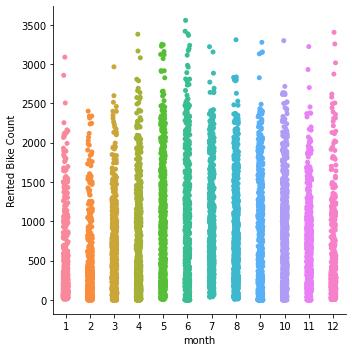

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(20,15), dpi =200)
sns.catplot(x='month', y='Rented Bike Count', data=dataset)
plt.show()

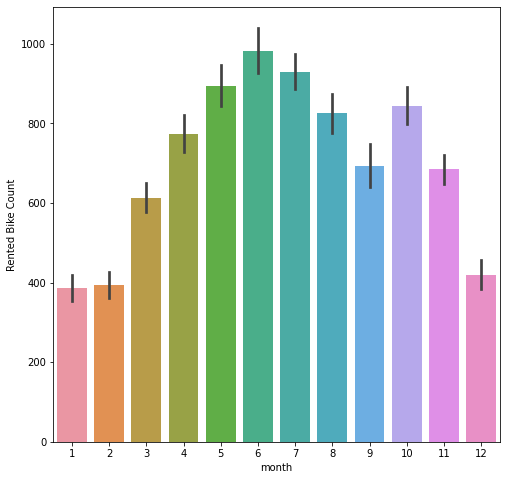

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(8,8))
sns.barplot(x='month', y='Rented Bike Count', data=dataset)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer :** We have pick categorical chart and bar chart to analyse the number of bike which is ranted from which helps to analyse that the given data which is divided into 12 month which we can easily see from the data.

##### 2. What is/are the insight(s) found from the chart?

**Answer :**  We have found that average of the ranted bike diveded into 122 month of an year which show that the demond of bike is different in different month like the season wise.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer  :**     Yes we have gain the importent insights that help us to create positive business impect as we can see from the graph that demand of bike is on the basis of month ie demond of bike is changes in everey month
so from the business prespective. 

We can analyse that high demond in the month like - May, June and July
and demond is moderate in the month of  - March, April, August, September, October, november and low demond in the month - January, February, December. 

So the company have to ready with the plan on the basis of the month. 

#### **Chart - 5 Weekdays Weekend  Data Analysis**

0    6216
1    2544
Name: weekdays_weekend, dtype: int64
 


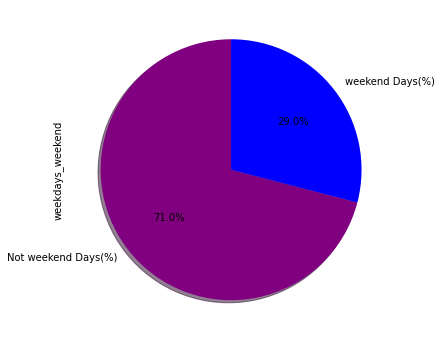

In [ ]:
# Chart - 5 visualization code
# Dependant Column Value Counts
print(dataset.weekdays_weekend.value_counts())
print(" ")
# Dependant Variable Column Visualization
dataset['weekdays_weekend'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not weekend Days(%)','weekend Days(%)'],
                               colors=['purple','blue'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

**Answer :** We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** From the above chart I got to know that, there are 6216 Bike has rented in which is not the weekend days which is 71% of the whole rated bike count data given in the dataset. In other hand, 2544 customers are Bike has rented in which is in weekend days which is 29% of the whole Ranted Bike count data given in the dataset.

These shows that demond of bike is high during non Weekend_day as compare to weekend days. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** We can analyse that there is high demond in non weekdays_weekend day but if we talk about weekdays_weekend there is no demond so this insight is very important for the business prespective there is high growth in business during non weekdays_weekend and there is less growth in weekdays_weekend.

#### **Chart - 6 Demond in Functioning Day and Non Functional day**

Yes    8465
No      295
Name: Functioning Day, dtype: int64


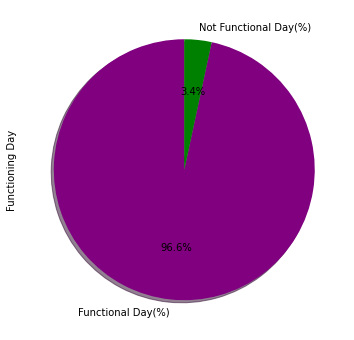

In [ ]:
# Chart - 6 visualization code
# Dependant Column Value Counts
print(dataset['Functioning Day'].value_counts())
# Dependant Variable Column Visualization
dataset['Functioning Day'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Functional Day(%)','Not Functional Day(%)'],
                               colors=['purple','green'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

**Answer :**  We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** From the above chart I got to know that, there are 8465 is not the Functional days which is 96.6% of the whole data given in the dataset. In other hand, 295 customers are in weekend days which is 3.4% of the whole data given in the dataset.

These shows that demond of bike is high during Functional day but there is now demond during Non functional day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :**  We can analyse that there is high demond in Functional day but if we talk about Non Functional Day there is no demond so this insight is very important for the business prespective there is high growth in business during Functional Day and there is highest negative growth in Non Functional Day.

#### **Chart - 7 Demond during Non Holidays and Holiday**

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


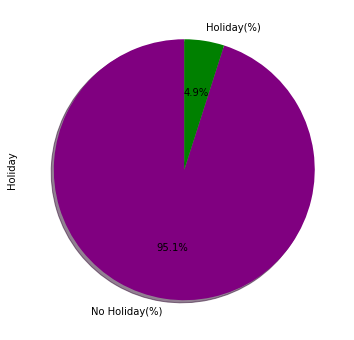

In [ ]:
# Chart - 7 visualization code
# Dependant Column Value Counts
print(dataset['Holiday'].value_counts())
# Dependant Variable Column Visualization
dataset['Holiday'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No Holiday(%)','Holiday(%)'],
                               colors=['purple','green'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

**Answer :** We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** Answer : From the above chart I got to know that, there are 8328 is on No Holiday which is 95.1% of the whole rated bike count data given in the dataset. In other hand, 432 customers are in Holiday days which is 4.9% of the whole Ranted Bike count data given in the dataset.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Ansawer :** We can analyse that there is high demond in Non Holiday but if we talk about holiday there is no demond so this insight is very important for the business prespective there is high growth in business during non holiday and there is highly negative growth in holidays.

#### **Chart - 8 Average Bikes Rented per Hour**

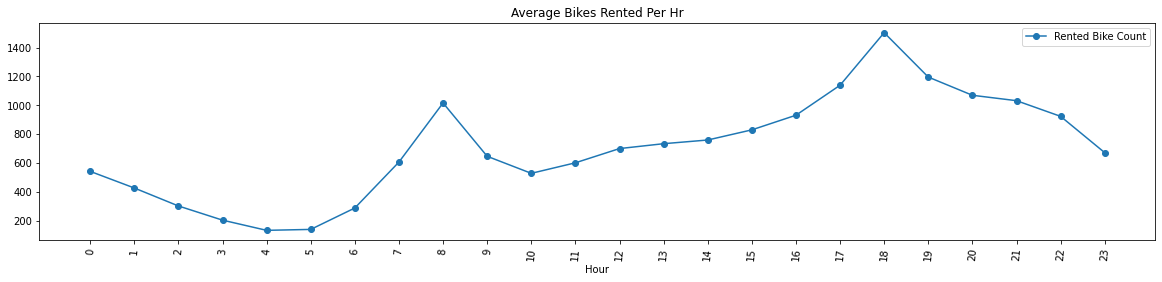

In [ ]:
# Chart - 8 visualization 
avg_rent_hrs = dataset.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

<Figure size 4000x3000 with 0 Axes>

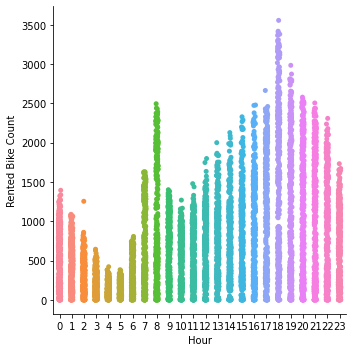

In [ ]:
# Chart  - 8 visualization code 

plt.figure(figsize=(20,15),dpi=200)
sns.catplot(x='Hour',y='Rented Bike Count',data=dataset)
plt.show()

We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 1. Why did you pick the specific chart?

**Answer :**  We have pick up the line and cat plot expresses a whole relationship in your data. Line represents the demond continuously.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** We can analyse that there is High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour for the office  hour.

We can analyse that there is high demond in Non Holiday but if we talk about holiday there is no demond so this insight is very important for the business prespective there is high growth in business during non holiday and there is highly negative growth in holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :**  We can analyse that there is high demond of Bike during ofice going and coming hours that means during office hours high positive business impect.


#### **Chart - 9 Demond of bike during Rainfall** 

In [ ]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

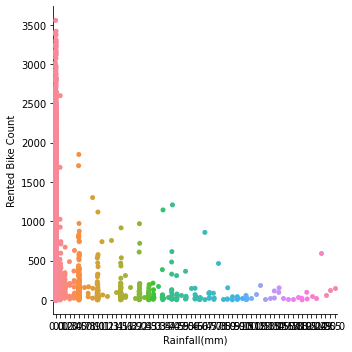

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,8))
sns.catplot(x='Rainfall(mm)', y='Rented Bike Count',data=dataset)
plt.show()

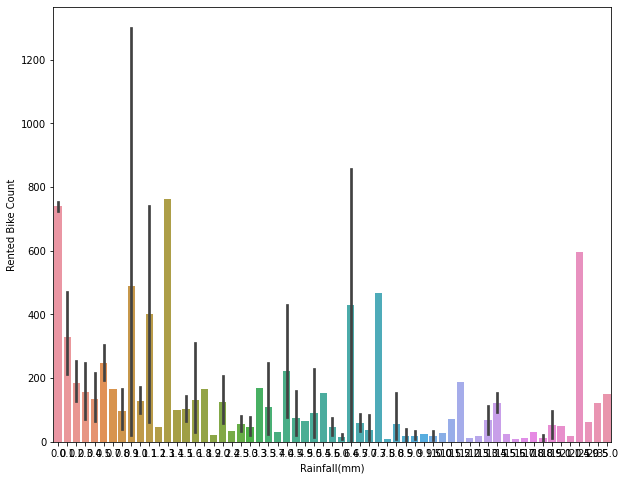

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,8))
sns.barplot(x='Rainfall(mm)', y='Rented Bike Count',data=dataset)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer :** We have pick categorical chart and bar chart to find relationship between ranted bike count and Rainfall by the helps that to analyse the given data.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** we can see that if Rainfall increase demand of Rented Bike Decreases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** From the given graph we can say that as  Rainfall increase demand of Rented Bike Decreases which lead to the negative impect on business.

#### **Chart - 10 Demond of bike during Snowfall**

<Figure size 576x576 with 0 Axes>

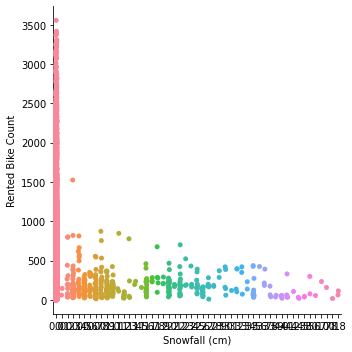

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(8,8))
sns.catplot(x='Snowfall (cm)',y='Rented Bike Count',data=dataset)
plt.show()

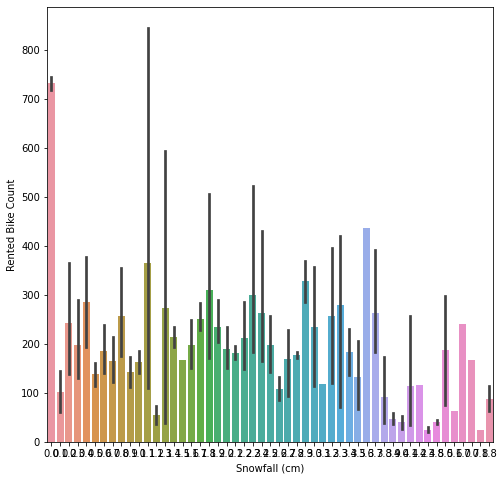

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(8,8))
sns.barplot(x='Snowfall (cm)',y='Rented Bike Count',data=dataset)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer :** We have pick categorical chart and bar chart to find relationship between ranted bike count and Snowfall by the helps that to analyse the given data.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** we can see that if if there is snowfall then there is decrease in the demond on rented bike.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** From the given graph we can say that if there is snowfall then there is decrease in demand of Rented Bike Decreases which lead to the negative impect on business.

#### **Chart - 11 Effect in Rented Bike with respect to temperature**

<Figure size 576x576 with 0 Axes>

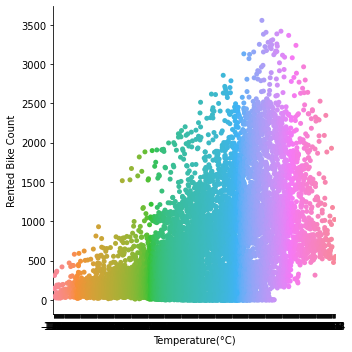

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8,8))
sns.catplot(x='Temperature(°C)',y='Rented Bike Count',data=dataset)
plt.show()

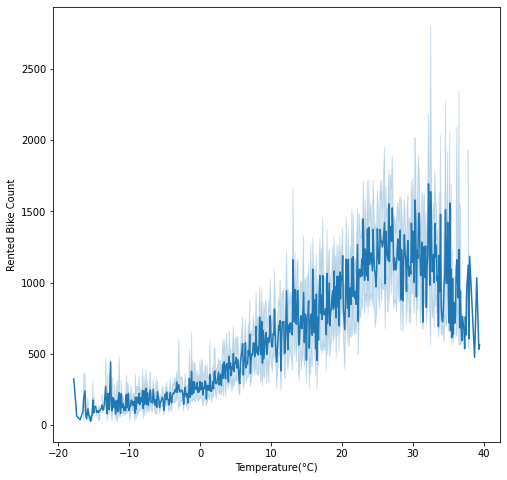

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8,8))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count',data=dataset)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer :** We have pick categorical chart and line chart to find relationship between ranted bike count and Snowfall by the helps that to analyse the given data.

##### 2. What is/are the insight(s) found from the chart?

**Answer :**  From the given graph we say that the rented bike count is directly proportional to temperature as the temperature is high the demond is high.

#### Chart - 12 - Correlation Heatmap

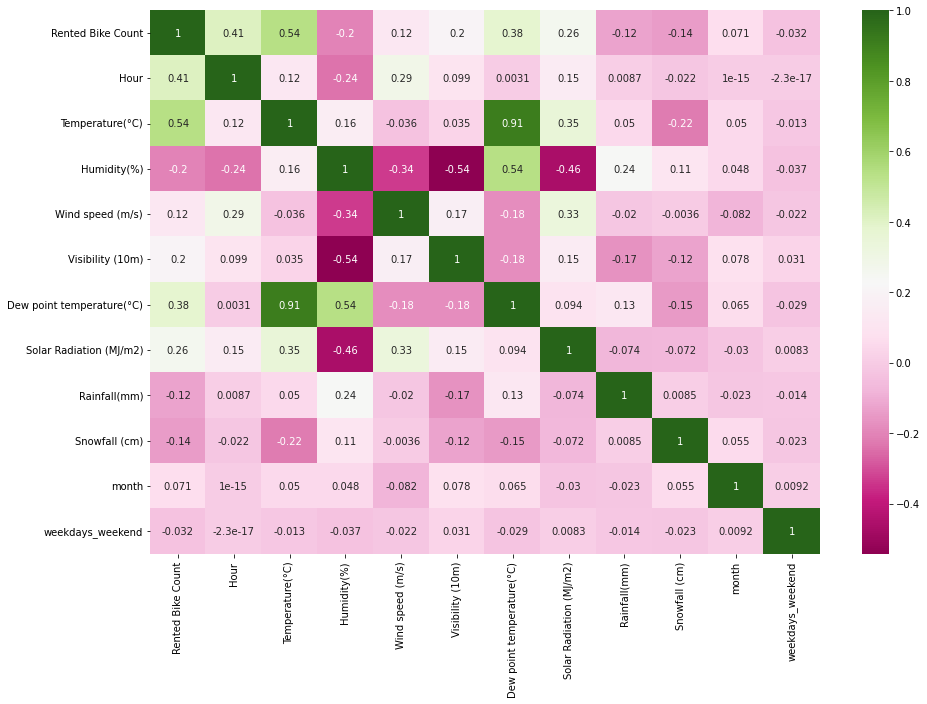

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), cmap ='PiYG', annot = True)

As we have seen from the heatmap that temperature and Due point temperature are highly corelated so we can drop one. 

##### 1. Why did you pick the specific chart?

  **Answer.** We have pick up this heatmap chart to find insights to analyse that how the given one variable are the corelation to another variable.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** We have found that temperature and due point temperature are highly corelated to each orther that why we have to remove any one of them and we can say that temperature and hour is highly effect to dependent variable 'Rented Bike count'.

In [ ]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

In [ ]:
# Droping highly correlated features for eleminating Multico-linearity
dataset=dataset.drop(['Dew point temperature(°C)'],axis=1)

#### Chart - 15 - Pair Plot 

In [ ]:
dataset.head()


Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

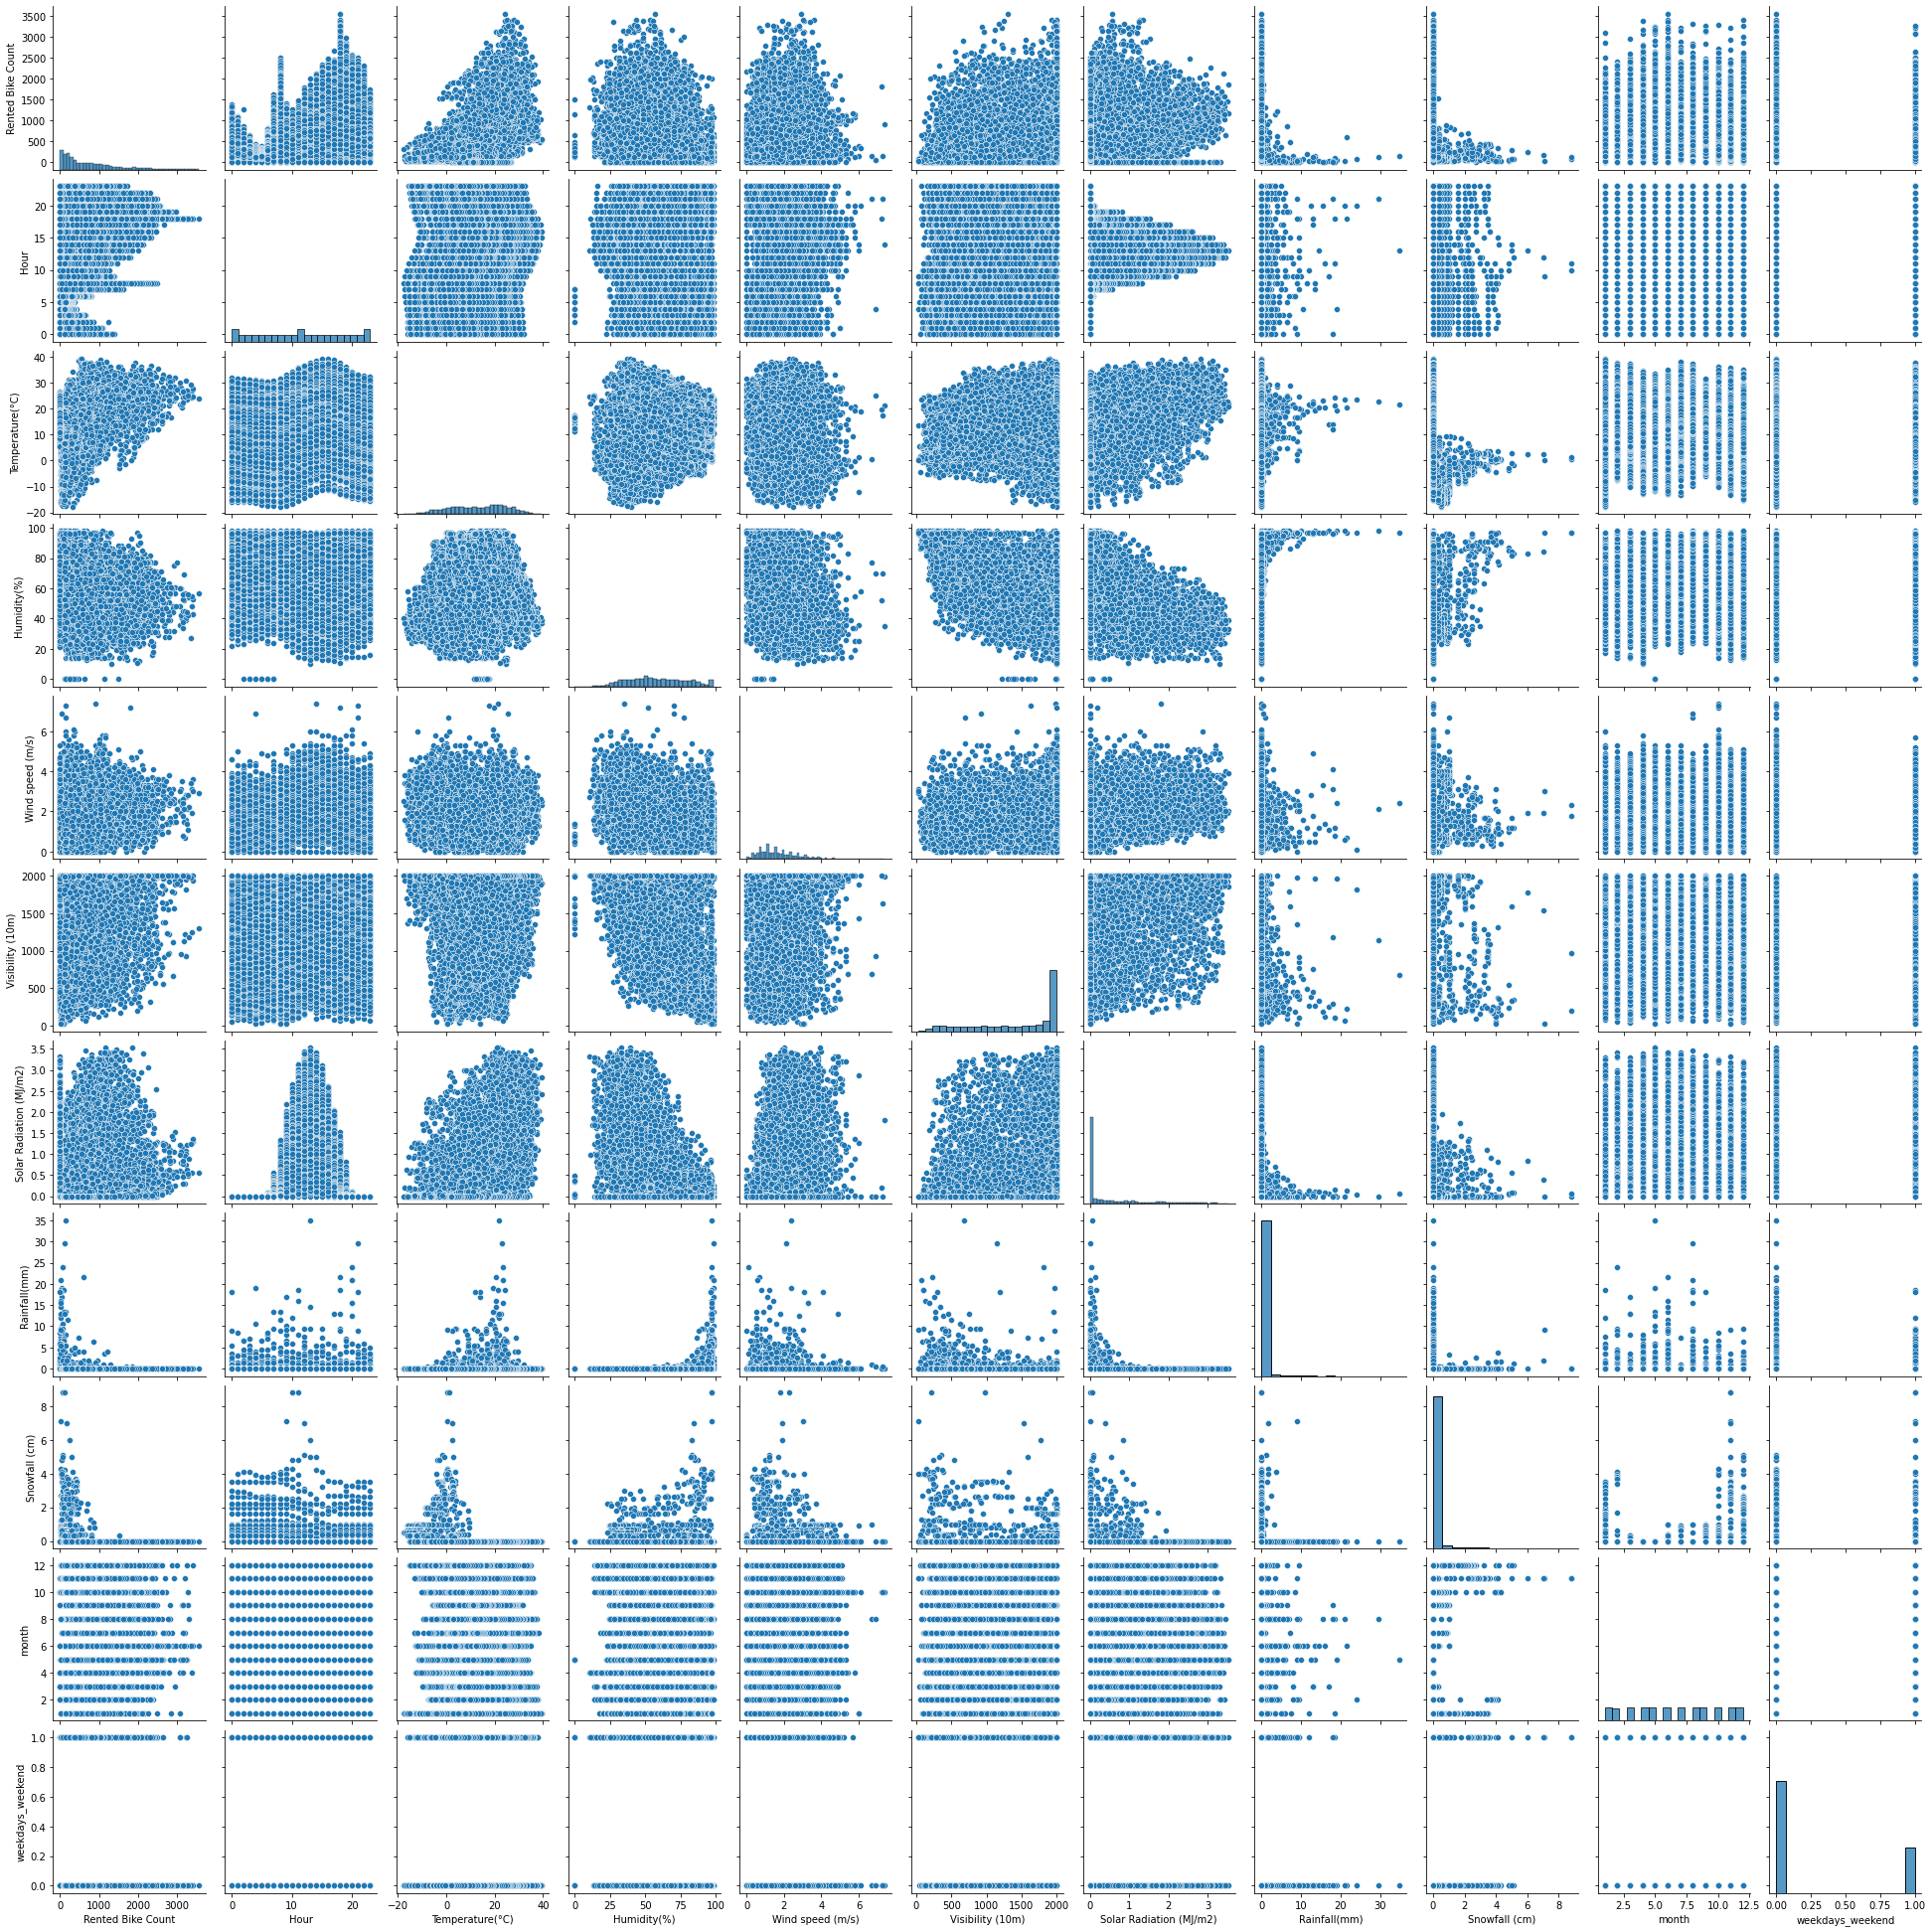

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset)

**Answer :** Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

**Answer :** From the above chart I got to know, there are less linear relationship between variables and data points aren't linearly separable

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We have different statistical tests for different scenarios:
1. Single categorical feature -> One proportion test
2. Two categorical features -> Chi squared test
3. More than two category in categorical features -> ANOVA test
4. One numerical and one categorical(=2 categories) feature-> ANOVA test
5. One numerical feature -> T-test
6. Two numerical feature -> Corelation test
7. One numerical and one categorical(>2 categories) feature -> T-test

Let's just define three hypothetical statements and perform the needed tests for the same

**Statements 1 :**

*   **Null Hypothesis :** There is no relation between Temperature and Ranted Bike Coount
*   **Alternate Hypothesis :** There is a relationship between Temperature and Ranted Bike Coount


**Statements 2 :**

*   **Null Hypothesis :** There is no relation between Holiday and Ranted Bike Coount

*   **Alternate Hypothesis :** There is a relationship between Holiday and Ranted Bike Coount


**Statements 3 :**

*   **Null Hypothesis :** There is no relation between Wind Speed and Ranted Bike Coount

*   **Alternate Hypothesis :** There is a relationship between Wind Speed and Ranted Bike Coount



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis :** There is no relation between "Temperature" and "Ranted Bike Coount"

**Alternate Hypothesis :** There is a relationship between "Temperature" and "Ranted Bike Coount"

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr


first_sample1 = dataset["Temperature(°C)"].head(100)
second_sample1 = dataset["Rented Bike Count"].head(100)

stat, p = pearsonr(first_sample1, second_sample1)
print('stat=%.3f, p = %.5f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')
     

stat=0.216, p = 0.03070
Rejected Null Hypothesis


**The above statistical test states that 'Rented Bike count' depends on 'Temperature' that is temperature is correlated with Rented Bike count.**

##### Which statistical test have you done to obtain P-Value?

**Answer :** Pearson Correlation

##### Why did you choose the specific statistical test?

**Answer :** To find the relationship between the testing series.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis :** There is no relation between "Holiday" and "Ranted Bike Coount"

**Alternate Hypothesis :** There is a relationship between "Holiday" and "Ranted Bike Coount"

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

first_sample2 = dataset['Holiday'].head(100)
second_sample2 = dataset["Rented Bike Count"].head(100)

stat, p = spearmanr(first_sample2, second_sample2)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=nan, p = nan
Rejected Null Hypothesis


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


**The above statistical test states that 'Rented Bike count' depends on 'Holiday' that is Holiday is correlated with Rented Bike count.**

##### Which statistical test have you done to obtain P-Value?

**Answer :** Spearmanr Correlation

##### Why did you choose the specific statistical test?

**Answer :** To find the relationship between the testing series.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis :** There is no relation between "Wind Speed" and Ranted "Bike Coount"

**Alternate Hypothesis :** There is a relationship between "Wind Speed" and "Ranted Bike Coount"

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr
first_sample = dataset["Wind speed (m/s)"].head(100)
second_sample = dataset["Rented Bike Count"].head(100)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.134, p = 0.18
Accept Null Hypothesis


**The above statistical test states that 'Rented Bike count' does not depends on 'Wind Speed' that is Wind Speed  is not is correlated with Rented Bike count.**

##### Which statistical test have you done to obtain P-Value?

**Answer :** Pearsonr Correlation

##### Why did you choose the specific statistical test?

**Answer :** To find the relationship between the testing series.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
dataset.isna().sum()

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
month                      0
weekdays_weekend           0
dtype: int64

As we can see that there is no null value persent into it therefore there is not a reguirement to handle missing value and null value of the data.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here. When we are working with large set of data then there is chance that missing value persent into it so we have to handle error and following are the techenique to handle missing value--



1.   Deleting Rows with missing values

2.   Impute missing values for continuous variable

3.   Using Algorithms that support missing values

4.   Prediction of missing values

5.   Imputation using Deep Learning Library 



### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  month                    8760 non-null   int64  
 13  weekdays_weekend         8760 non-null   int64  
dtypes: float64(5), int64(6),

In [ ]:
#Define variable
continuous_variable = ['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Temperature(°C)','Visibility (10m)','Humidity(%)','Hour','Snowfall (cm)','Rented Bike Count']
categorical_variable =['Sasons','Holiday','Functioning Day','Weekdays_weekend','Month']
object_data =['Seasons','Month','Holiday','Functional Day',]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

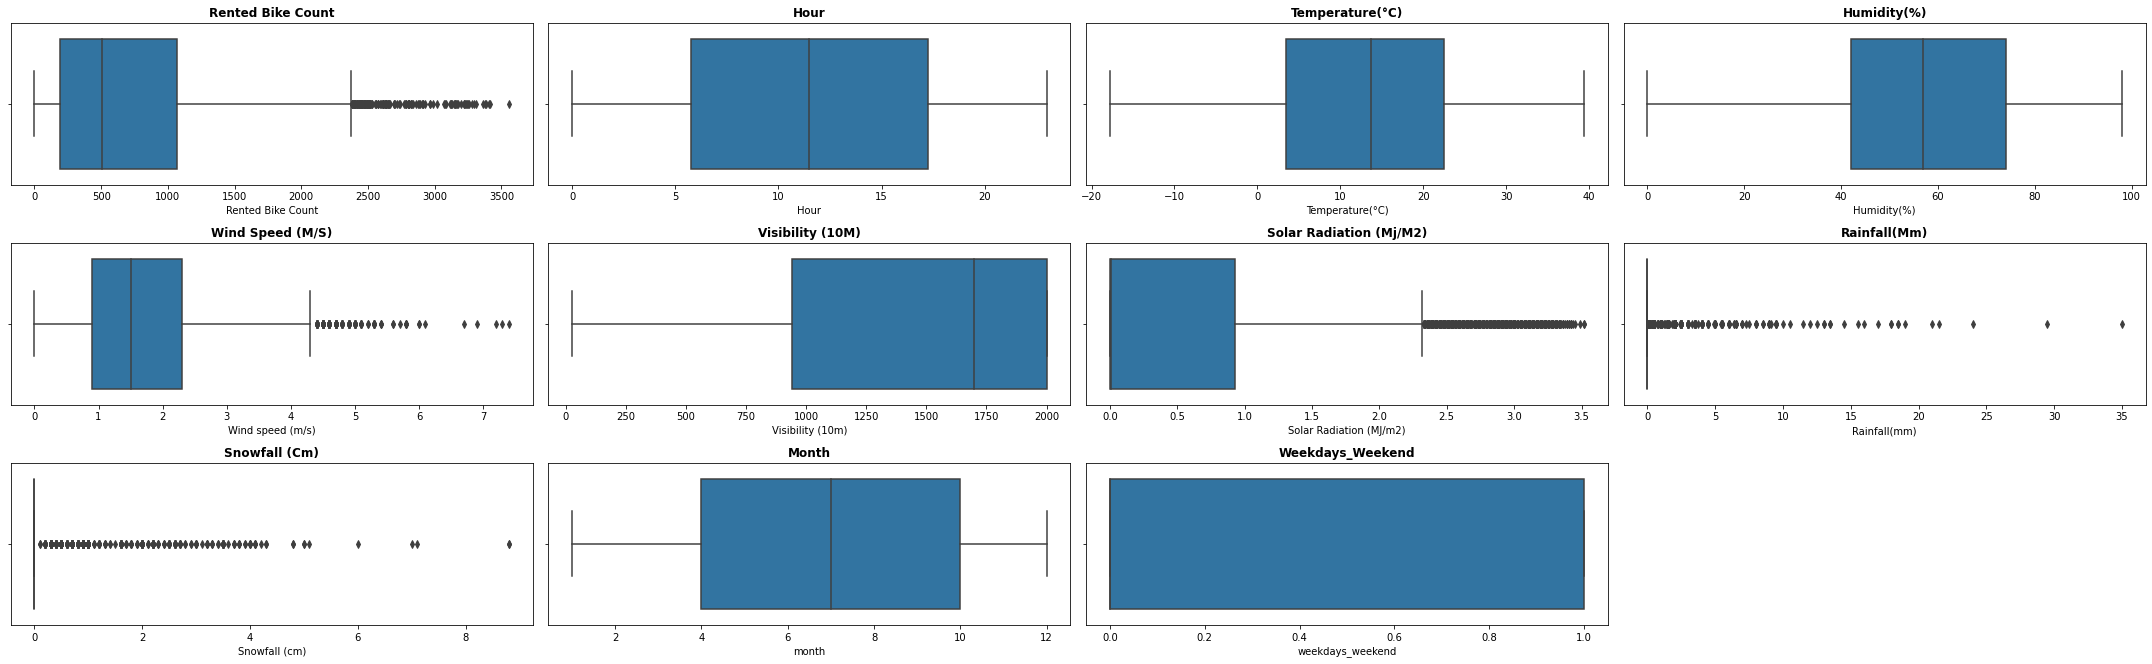

In [ ]:
# code to find outliers
plt.figure(figsize=(30,15))
for n,column in enumerate(dataset.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
     

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continuous_variable:
  print(feature,":")
  detect_outliers(dataset[feature])
  print("\n")

Wind speed (m/s) :
q1:0.9, q2:1.5, q3:2.3
Lower bound: -1.1999999999999997, Upper bound: 4.3999999999999995, IQR: 1.4
Total number of outliers are: 161
Total percentage of outlier is: 1.84 %


Solar Radiation (MJ/m2) :
q1:0.0, q2:0.01, q3:0.93
Lower bound: -1.395, Upper bound: 2.325, IQR: 0.93
Total number of outliers are: 641
Total percentage of outlier is: 7.32 %


Rainfall(mm) :
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 528
Total percentage of outlier is: 6.03 %


Temperature(°C) :
q1:3.5, q2:13.7, q3:22.5
Lower bound: -25.0, Upper bound: 51.0, IQR: 19.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Visibility (10m) :
q1:940.0, q2:1698.0, q3:2000.0
Lower bound: -650.0, Upper bound: 3590.0, IQR: 1060.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Humidity(%) :
q1:42.0, q2:57.0, q3:74.0
Lower bound: -6.0, Upper bound: 122.0, IQR: 32.0
Total number of outliers are: 0
Total perce

Below mentioned continous features with the percentage of outliers:

1. "Wind Sped" - 1.84%
2. "Solar Radiation" - 7.32%
3. "Rainfall" - 6.03%
4. "Snowfall" - 5.06%
5. "Rented Bike Count" - 1.8%

Let's define a function for the outlier treatment using IQR technique and cap the outliers in 25-75 percentile.

In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continuous_variable:
  dataset[feature]= treat_outliers_iqr(dataset[feature])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

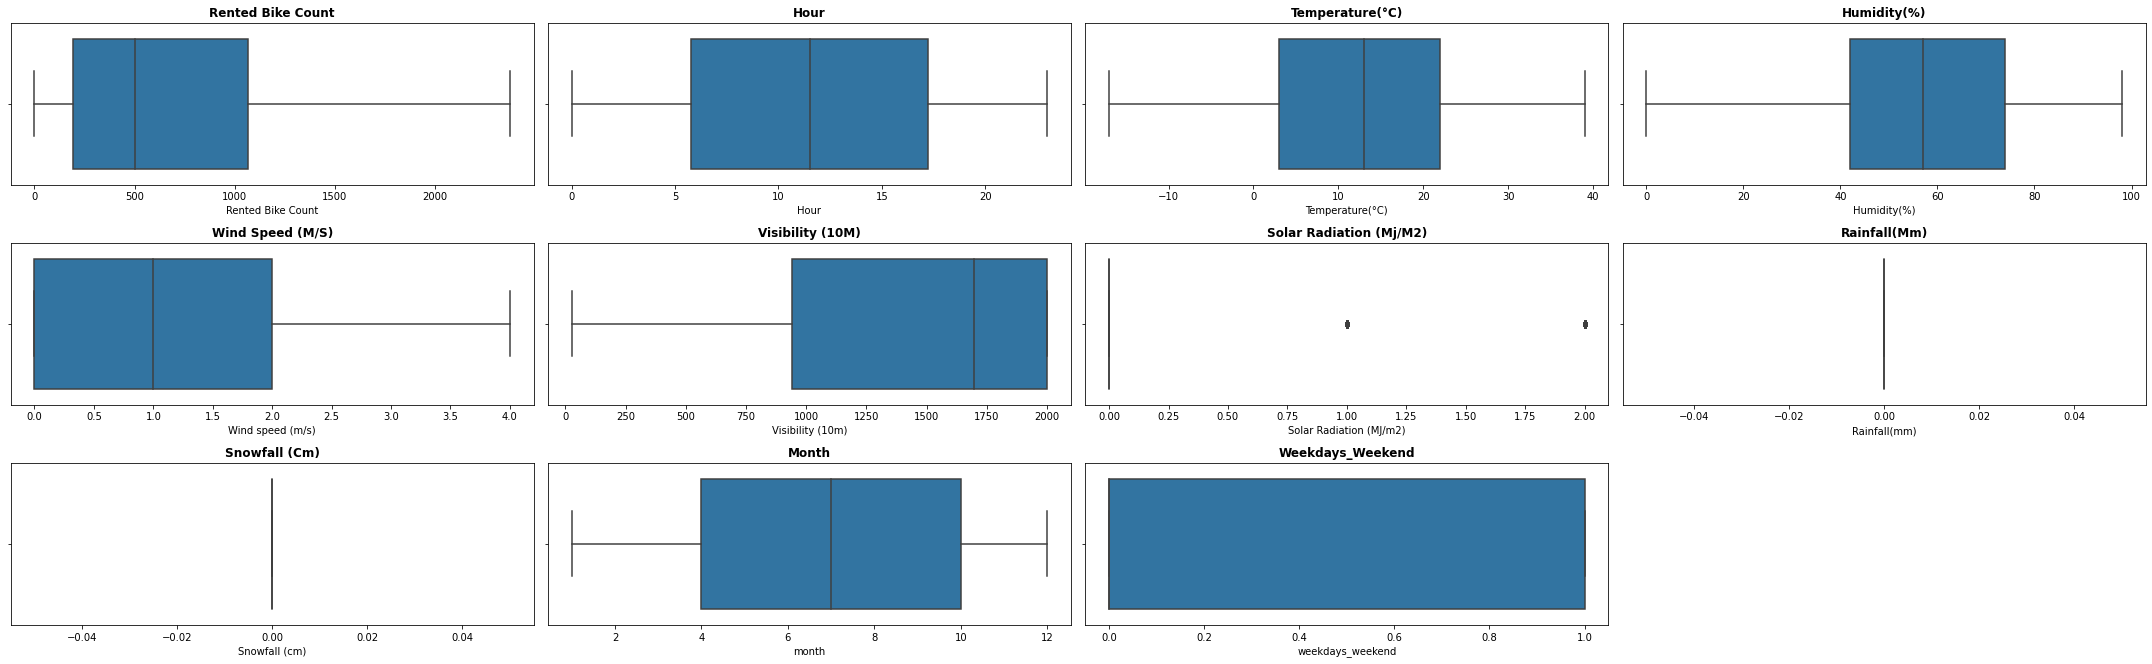

In [ ]:
plt.figure(figsize=(30,15))
for n,column in enumerate(dataset.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
     

In [ ]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in continuous_variable:
  print(feature,":")
  detect_outliers(dataset[feature])
  print("\n")

Wind speed (m/s) :
q1:0.0, q2:1.0, q3:2.0
Lower bound: -3.0, Upper bound: 5.0, IQR: 2.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Solar Radiation (MJ/m2) :
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 1456
Total percentage of outlier is: 16.62 %


Rainfall(mm) :
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Temperature(°C) :
q1:3.0, q2:13.0, q3:22.0
Lower bound: -25.5, Upper bound: 50.5, IQR: 19.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Visibility (10m) :
q1:940.0, q2:1698.0, q3:2000.0
Lower bound: -650.0, Upper bound: 3590.0, IQR: 1060.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Humidity(%) :
q1:42.0, q2:57.0, q3:74.0
Lower bound: -6.0, Upper bound: 122.0, IQR: 32.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Hour :
q1:5.7

#### Bivariate analysis of Outliers

In [ ]:
categorical_variable =['Seasons','Holiday','Functioning Day']

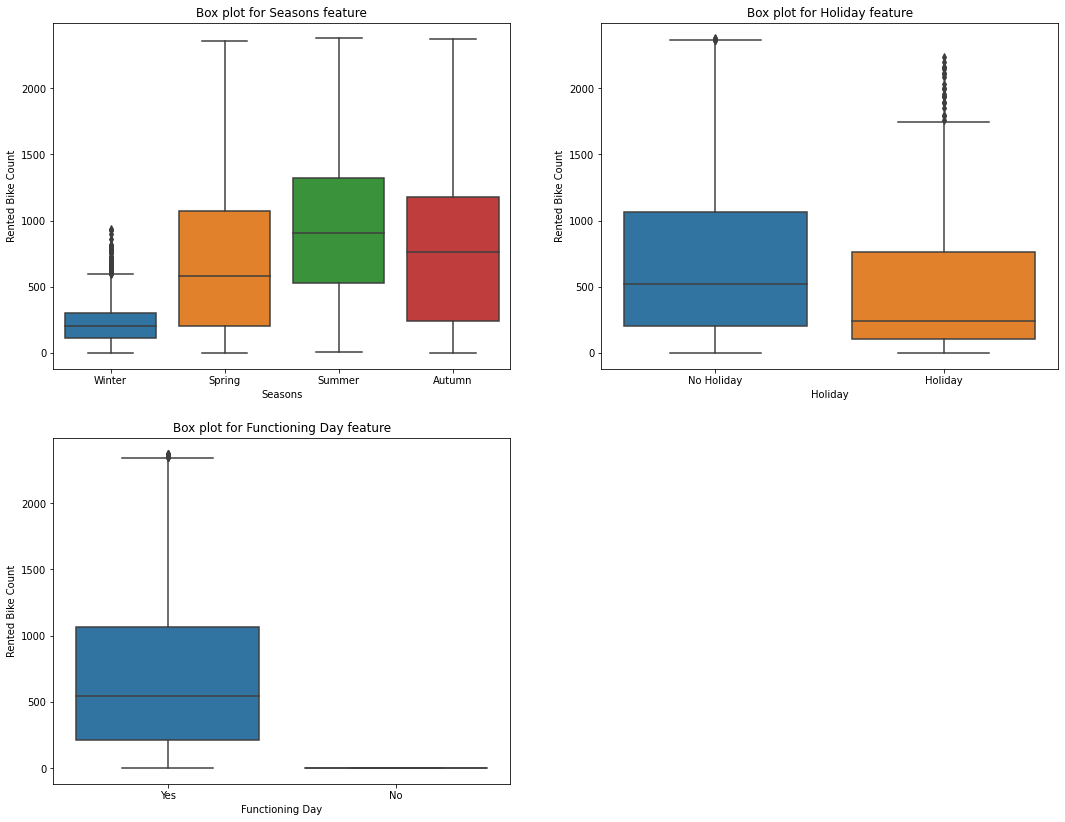

In [ ]:

# Checking the outliers present in each category
plt.figure(figsize=(18,14))
for i,j in enumerate(categorical_variable):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=dataset[j], y=dataset["Rented Bike Count"])
  plt.title(f"Box plot for {j} feature")

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the category of object dtype features
for feature in categorical_variable:
  print(f"Feature: {feature}")
  for num,cat in enumerate(dataset[feature].unique().tolist()):
    print(f"{num+1}: Category: {cat}")
    detect_outliers(dataset[dataset[feature]==cat]["Rented Bike Count"])
    print("\n")

Feature: Seasons
1: Category: Winter
q1:110.0, q2:203.0, q3:305.0
Lower bound: -182.5, Upper bound: 597.5, IQR: 195.0
Total number of outliers are: 59
Total percentage of outlier is: 2.73 %


2: Category: Spring
q1:206.0, q2:583.0, q3:1071.0
Lower bound: -1091.5, Upper bound: 2368.5, IQR: 865.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


3: Category: Summer
q1:526.75, q2:905.5, q3:1318.0
Lower bound: -660.125, Upper bound: 2504.875, IQR: 791.25
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


4: Category: Autumn
q1:241.75, q2:763.5, q3:1175.0
Lower bound: -1158.125, Upper bound: 2574.875, IQR: 933.25
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Feature: Holiday
1: Category: No Holiday
q1:200.0, q2:524.5, q3:1065.0
Lower bound: -1097.5, Upper bound: 2362.5, IQR: 865.0
Total number of outliers are: 13
Total percentage of outlier is: 0.16 %


2: Category: Holiday
q1:105.75, q2:240.0, q3:762.5
Lower bound: -879.3

Although we have some categorical outliers in the dataset but we will not treat them because we are going to implement ML model and algorithm can easily handle these categorical outliers without information loss.

###What all outlier treatment techniques have you used and why did you use those techniques?

Since, the outliers present in some of the continous features i.e "Wind Speed", "Solar Radiation", "Rainfall", "Snowfall", "Rentedee Bike Count" having the percentage 1.84%, 7.32% ,6.03%, 5.06%, 1.8% respectively.

We have defined the two seperate funtions one is for "outlier detection" and the other is for "outlier treatment using IQR" and passed all the observations of continous features through it. We have successfully capped out extreme left outliers(<25%) and extreme outliers (>75%) in the 25th and 75th quartile value.

### 3. Categorical Encoding

In [ ]:
#Extracting categorical features
categorical_features= dataset.select_dtypes(include='object')
categorical_features

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

In [ ]:
# Encode your categorical columns of Season 
dataset['Winter'] = np.where(dataset['Seasons']=='Winter',1,0)
dataset['Spring'] = np.where(dataset['Seasons']=='Spring',1,0)
dataset['Summer'] = np.where(dataset['Seasons']=='Summer',1,0)
dataset['Autumn'] = np.where(dataset['Seasons']=='Autumn',1,0)

# Drop the original column Season from the dataframe
dataset.drop(columns=['Seasons'], axis=1, inplace=True)

In [ ]:
# find the all unique categorical data  of Holiday
dataset['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
# Encode your categorical columns of Holiday
dataset[' Holiday '] = np.where(dataset['Holiday']=='Holiday' ,1,0)
dataset['No Holiday'] = np.where(dataset['Holiday']==' No Holiday' ,1,0)


# Drop the original column Holiday from the dataframe
dataset.drop(columns=['Holiday'],axis=1, inplace=True)

In [ ]:
dataset['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Encode your categorical columns of Holiday
dataset['Functional day'] = np.where(dataset['Functioning Day']=='Yes',1,0)
dataset['Not Functional day'] = np.where(dataset['Functioning Day']=='No',1,0)

# Drop the original column Holiday from the dataframe
dataset.drop(columns=['Functioning Day'],axis=1, inplace=True)

In [ ]:
dataset.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0               -5           37                 2   
1                204     1               -5           38                 0   
2                173     2               -6           39                 1   
3                107     3               -6           40                 0   
4                 78     4               -6           36                 2   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                        0             0              0   
1              2000                        0             0              0   
2              2000                        0             0              0   
3              2000                        0             0              0   
4              2000                        0             0              0   

   month  weekdays_weekend  Winter  Spring  Summer  Autumn   Holiday   \
0      1                 0       1       0       0       0          0   
1      1                 0       1       0       0       0          0   
2      1                 0       1       0       0       0          0   
3      1                 0       1       0       0       0          0   
4      1                 0       1       0       0       0          0   

   No Holiday  Functional day  Not Functional day  
0           0               1                   0  
1           0               1                   0  
2           0               1                   0  
3           0               1                   0  
4           0               1                   0

In [ ]:
# Encode your categorical columns of Hour, Month, Weekend column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  dataset[col]=dataset[col].astype('category')

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
dataset = pd.get_dummies(dataset,drop_first=True,sparse=True)
dataset.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254               -5           37                 2   
1                204               -5           38                 0   
2                173               -6           39                 1   
3                107               -6           40                 0   
4                 78               -6           36                 2   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                        0             0              0   
1              2000                        0             0              0   
2              2000                        0             0              0   
3              2000                        0             0              0   
4              2000                        0             0              0   

   Winter  Spring  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       1       0  ...        0        0        0        0        0        0   
1       1       0  ...        0        0        0        0        0        0   
2       1       0  ...        0        0        0        0        0        0   
3       1       0  ...        0        0        0        0        0        0   
4       1       0  ...        0        0        0        0        0        0   

   month_10  month_11  month_12  weekdays_weekend_1  
0         0         0         0                   0  
1         0         0         0                   0  
2         0         0         0                   0  
3         0         0         0                   0  
4         0         0         0                   0  

[5 rows x 51 columns]

In [ ]:
dataset.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Winter', 'Spring', 'Summer', 'Autumn',
       ' Holiday ', 'No Holiday', 'Functional day', 'Not Functional day',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

In [ ]:
dataset.shape

(8760, 51)

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Answer :** 

a. We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

b. Since, we have 3 to 4 unique orderless categories in all the categorical features (which is less in number). So, it is good to use Nominal encoding technique than ordinal.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

We don't have textual data in any of the feature so it is not needed for our project

#### 1. Expand Contraction

In [ ]:
#Not needed for this project

#### 2. Lower Casing

In [ ]:
#Not needed for this project

#### 3. Removing Punctuations

In [ ]:
#Not needed for this project

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
#Not needed for this project

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
#Not needed for this project

In [ ]:
#Not needed for this project

#### 6. Rephrase Text

In [ ]:
#Not needed for this project

#### 7. Tokenization

In [ ]:
#Not needed for this project

#### 8. Text Normalization

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


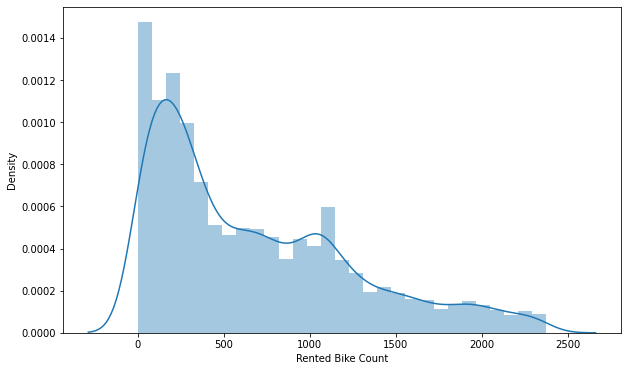

In [ ]:
#Distribution plot of Rented Bike Count

plt.figure(figsize=(10,6))
sns.distplot(dataset['Rented Bike Count'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


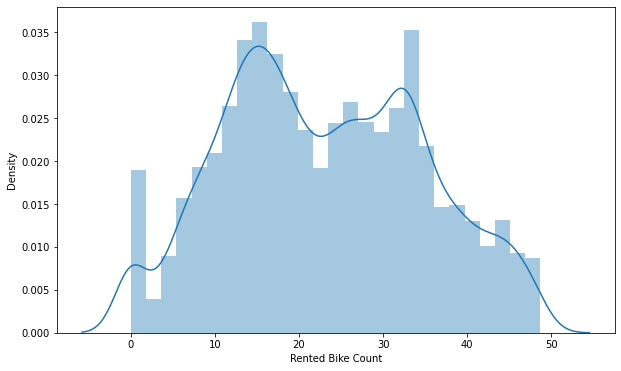

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(dataset['Rented Bike Count']))


Not needed for this project

#### 9. Part of speech tagging

In [ ]:
#Not needed for this project

#### 10. Text Vectorization

In [ ]:
#Not needed for this project

##### Which text vectorization technique have you used and why?

Not needed for this project

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
dataset.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Winter', 'Spring', 'Summer', 'Autumn',
       ' Holiday ', 'No Holiday', 'Functional day', 'Not Functional day',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

In [ ]:
# Transform Your data
dataset['Rented Bike Count']=np.log1p(dataset['Rented Bike Count'])

### 6. Data Scaling

In [ ]:
# Scaling your data
X = dataset.drop(columns = ['Rented Bike Count'] , axis = 1)
y = dataset['Rented Bike Count']

##### Which method have you used to scale you data and why?

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train , X_test, y_train, y_test =train_test_split(X, y, test_size= .2 , random_state =0 )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train.shape

(7008, 50)
(1752, 50)
(7008,)
(1752,)


(7008,)

##### What data splitting ratio have you used and why? 

Answer : we have taken **80% for Training Data**  and **20% for test data** because  we want to go by the standard norms distribution.

## ***7. ML Model Implementation***

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error  

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  ## Adjusted R2_score
  Adj_R2 = (1-(1-r2_score(y_train, y_train_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  print( 'Adjusted R2 on train is :', Adj_R2)
  Adj_R2 = (1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  print( 'Adjusted R2 on test is :', Adj_R2)

  print("-"*50)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### **Linear Regression**

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 1 Implementation
regressor= LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)

# Predict the model
y_train_regression_pred= regressor.predict(X_train)
y_test_regression_pred= regressor.predict(X_test)

In [ ]:
regressor.score(X_train, y_train)

0.8151994380085347

In [ ]:
regressor.coef_

array([ 2.57015876e+00, -1.85667699e+00, -1.32839316e-01,  1.03981436e-01,
        9.68018608e-02,  6.28809366e+10, -2.06431844e+10,  4.10735466e+11,
        4.10735466e+11,  4.10735466e+11,  4.10735466e+11, -3.34848010e-01,
       -9.98545376e+09,  2.77528105e+10,  2.77528105e+10, -1.32207954e-01,
       -4.67910918e-01, -8.26481719e-01, -1.15491305e+00, -1.09497787e+00,
       -4.39437113e-01,  1.75482322e-01,  5.24245695e-01,  8.97693352e-02,
       -2.71817191e-01, -2.74174441e-01, -2.38721127e-01, -2.66517452e-01,
       -2.72134487e-01, -2.36269286e-01, -1.03726476e-01,  9.95351240e-02,
        2.90476449e-01,  2.66940639e-01,  2.59140577e-01,  3.68688569e-01,
        3.30963545e-01,  9.02241184e-02, -2.73426611e-02,  1.76693626e-01,
        6.02579515e-04,  1.01227723e-01,  3.61732682e-01,  1.30966158e-01,
       -1.89077702e-02,  1.18085232e-01,  3.14324185e-01,  2.55266970e-01,
        1.22064556e-01, -6.34898887e-02])

In [ ]:
regressor.intercept_

-438488276300.8109

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**



In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

--------------------------------------------------
MAE on train is: 0.4678706517329548
MAE on test is: 0.45972889513512144
--------------------------------------------------
MSE on train is: 0.4428361933802253
MSE on test is: 0.4365145247221446
--------------------------------------------------
RMSE on train is: 0.6654593852221375
RMSE on test is: 0.6606924585025507
--------------------------------------------------
MAPE on train is: 8183469869671342.0  %
MAPE on test is: 9268390375674630.0  %
--------------------------------------------------
R2 on train is: 0.8151994380085347
R2 on test is: 0.833407346119748
--------------------------------------------------
Adjusted R2 on train is : 0.8097673227236591
Adjusted R2 on test is : 0.8285104427135089
--------------------------------------------------


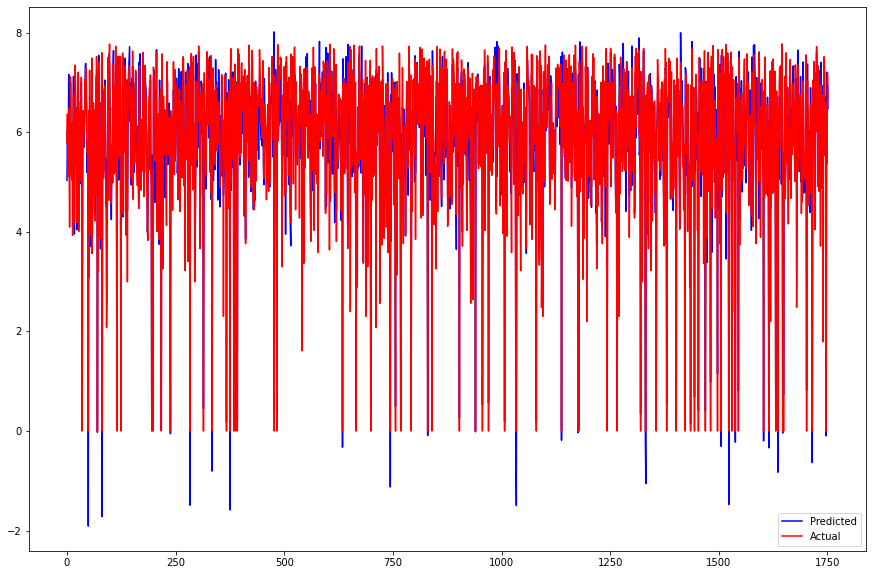

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_regression_pred, color='Blue')
plt.plot(np.array(y_test), color='Red')
plt.legend(["Predicted","Actual"])
plt.show()

We have started with the most basic and simple ML model i.e Linear Regression. We have tried to evaluate the most important regression metics on both the train and test datesets so that we can conclude our ML model. Here for Linear Regression, we can observe that both the r2 scores are pretty close which explains that on test dataset and our model is following the correct way. 


We can comprehend that 'dependent' and 'independent' variables and y we got 0.83 maximum r2 score in LR model implementation.

In order to fetch good and more accurate results, we shall go for cross- Validation & Hyperparameter Tuning of 'Lasso', 'Ridge' and 'Elastic Net' models.

####**2. Cross- Validation & Hyperparameter Tuning**

### **Ridge (L2) Regression**

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(X_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(X_train)
y_test_ridge_pred = ridgeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

The best alpha value found out to be: {'alpha': 0.1, 'max_iter': 1}
Negative mean square error is: -0.44934683121259517


In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

--------------------------------------------------
MAE on train is: 0.4678656948130241
MAE on test is: 0.4597418131984671
--------------------------------------------------
MSE on train is: 0.4428361057724141
MSE on test is: 0.4365249201265242
--------------------------------------------------
RMSE on train is: 0.6654593193970719
RMSE on test is: 0.6607003255081113
--------------------------------------------------
MAPE on train is: 8184028897570916.0  %
MAPE on test is: 9271210186364746.0  %
--------------------------------------------------
R2 on train is: 0.8151994745682671
R2 on test is: 0.8334033787878364
--------------------------------------------------
Adjusted R2 on train is : 0.8097673603580458
Adjusted R2 on test is : 0.8285063587639633
--------------------------------------------------


In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

NameError: ignored

### **Lasso (L1) Regression**

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(X_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(X_train)
y_test_lasso_pred = lassoR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.232e+03, tolerance: 1.352e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+03, tolerance: 1.361e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+03, tolerance: 1.326e+00

The best alpha value found out to be: {'alpha': 0.0001, 'max_iter': 10}
Negative mean square error is: -0.4514492892156151


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+03, tolerance: 1.679e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

--------------------------------------------------
MAE on train is: 0.46792257446925284
MAE on test is: 0.45945364055321714
--------------------------------------------------
MSE on train is: 0.4429447937250809
MSE on test is: 0.43658033994274975
--------------------------------------------------
RMSE on train is: 0.6655409782463292
RMSE on test is: 0.6607422643835869
--------------------------------------------------
MAPE on train is: 8183176093544148.0  %
MAPE on test is: 9266764966788918.0  %
--------------------------------------------------
R2 on train is: 0.8151541178539001
R2 on test is: 0.8333822282103879
--------------------------------------------------
Adjusted R2 on train is : 0.8097206704069249
Adjusted R2 on test is : 0.8284845864764192
--------------------------------------------------


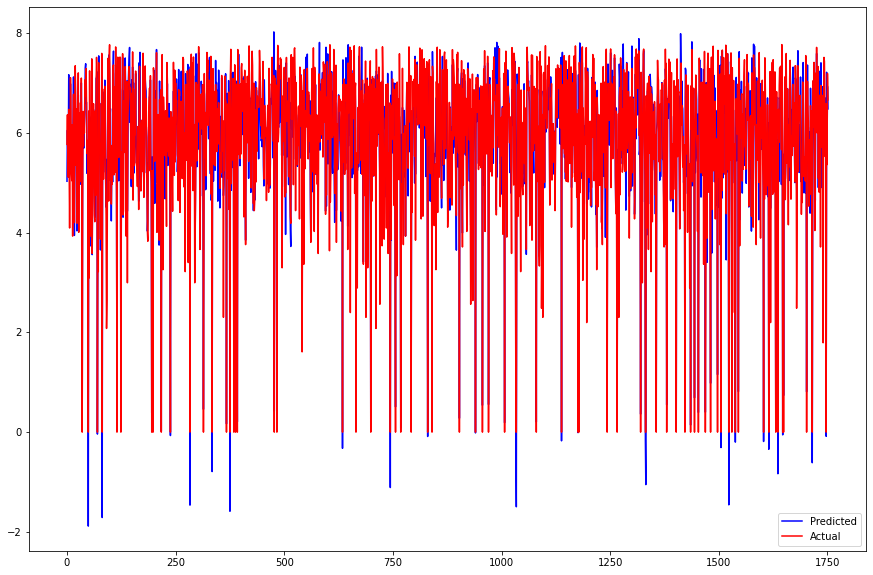

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_lasso_pred, color='Blue')
plt.plot(np.array(y_test), color='Red')
plt.legend(["Predicted","Actual"])
plt.show()

**Elastic Net Regresson**

In [ ]:
# import elastic net regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Creating e_net instance
e_net= ElasticNet()

# Defining hyperparameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(X_train,y_train)

# Predict the output
y_train_e_net_pred = e_netR.predict(X_train)
y_test_e_net_pred = e_netR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+03, tolerance: 1.352e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+03, tolerance: 1.361e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e+03, tolerance: 1.326e+00

The best alpha value found out to be: {'alpha': 0.0001, 'max_iter': 12}
Negative mean square error is: -0.4514201137711237


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e+03, tolerance: 1.679e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Calculating regression metrics for Elastic Net
regression_metrics(y_train,y_train_e_net_pred,y_test,y_test_e_net_pred)

--------------------------------------------------
MAE on train is: 0.46781619152783943
MAE on test is: 0.4594381173084652
--------------------------------------------------
MSE on train is: 0.44288451793399586
MSE on test is: 0.4365116846761121
--------------------------------------------------
RMSE on train is: 0.6654956934000369
RMSE on test is: 0.6606903092040265
--------------------------------------------------
MAPE on train is: 8176955344458506.0  %
MAPE on test is: 9258030605885454.0  %
--------------------------------------------------
R2 on train is: 0.8151792716246025
R2 on test is: 0.8334084300030529
--------------------------------------------------
Adjusted R2 on train is : 0.809746563559482
Adjusted R2 on test is : 0.8285115584569933
--------------------------------------------------


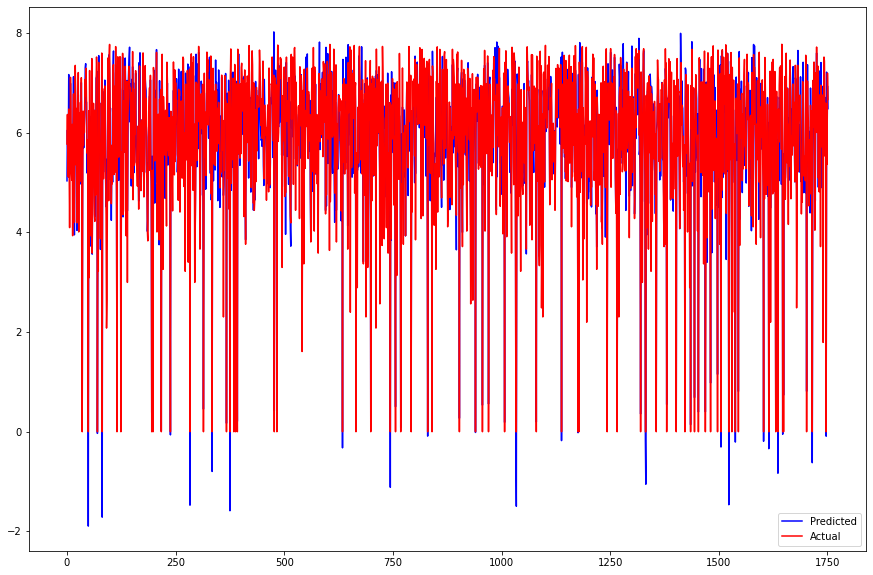

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_e_net_pred, color='Blue')
plt.plot(np.array(y_test), color='Red')
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Answer :** We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer :**  Despite using Lasso, Ridge and Elastic net models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This shows that  we have to go for higher and more complex ML models like Decision trees, Random Forest, LightGBM Regression and XGBoost Regression.

### **ML Model -  2 Implementing Decision Tree Regression**

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
TreeR = DecisionTreeRegressor(max_depth=10) 
  
# fit the regressor with X and Y data
TreeR.fit(X_train, y_train)

# predict the model
y_train_tree_pred= TreeR.predict(X_train)
y_test_tree_pred= TreeR.predict(X_test)

In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_tree_pred,y_test,y_test_tree_pred)

NameError: ignored

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Answer** After apply LR models, we tried 'Decision Tree' and we saw a good increment in the r2 score from 0.83 to 0.84 that means "90% Variance of our test dataset is captured by our trained model" which is excellent. On the other side our RMSE also decreased and shifted below 5(=4.7) which is very good.Also accuracy increased from 93% to 95%. On the other hand from the residual plot our values of mean and median are shifting towards 0 that means our model is improving. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

**Answer :** After apply Linear Regression model, We tried 'Decision Tree' and we see that r2 score have been increased by 1% that is .83 to .849 that mean '84.9%' Variannce of our thes data has been captured by trained the model  which is good so we have decided to further tune the hyperparameters and check the results. 

#### **2. Cross- Validation & Hyperparameter Tuning**



**Decision Tree with GridSearchCV**

In [ ]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [8,9,10], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(X_train,y_train)

# Predict the output
y_train_grid_Dtree_pred = decision_treeR.predict(X_train)
y_test_grid_Dtree_pred = decision_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")

The best alpha value found out to be: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 4}
Negative mean square error is: -0.35590973125529407


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got th

In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_grid_Dtree_pred,y_test,y_test_grid_Dtree_pred)

--------------------------------------------------
MAE on train is: 0.3652879769097087
MAE on test is: 0.39779805588235323
--------------------------------------------------
MSE on train is: 0.2707277689332808
MSE on test is: 0.34231399583536787
--------------------------------------------------
RMSE on train is: 0.5203150669866103
RMSE on test is: 0.5850760598720203
--------------------------------------------------
MAPE on train is: 6.7810950722665835  %
MAPE on test is: 7.633022527306657  %
--------------------------------------------------
R2 on train is: 0.8870222339694604
R2 on test is: 0.8693583058596572
--------------------------------------------------
Adjusted R2 on train is : 0.8837013119814964
Adjusted R2 on test is : 0.8655181619989769
--------------------------------------------------


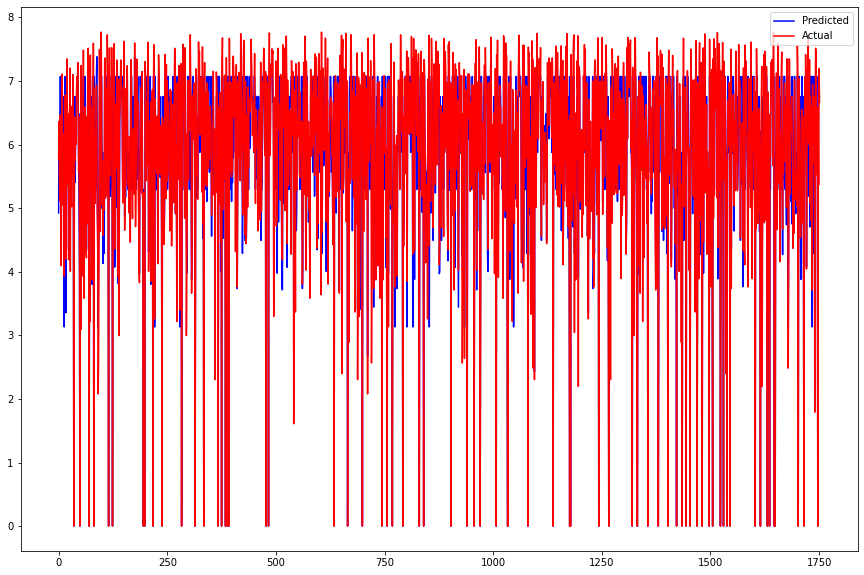

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_grid_Dtree_pred, color='Blue')
plt.plot(np.array(y_test), color='Red')
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Answwer :** We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be  **{'max_depth': [8,9, 10], 'min_samples_leaf':[6, 7, 8] 'min_samples_split':[1, 2, 3, 4}** which resulted into the improvement in the MSE from 43% to 34% on the test dataset by hyperparameter tuning of Decision trees.

###3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value. So the Rented Bike Count, the dependent variable, which impacts the business is getting accurately predicted to the extent of ~ 86.9% and ~3% far from the mean of actual absolute values.

### **ML Model - Implementing Random Forest Regressor**

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=10) 
  
# fit the regressor with X and Y data
RF_TreeR.fit(X_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(X_train)
y_test_RFtree_pred= RF_TreeR.predict(X_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

--------------------------------------------------
MAE on train is: 0.32651240841386653
MAE on test is: 0.3713506138089945
--------------------------------------------------
MSE on train is: 0.20877152026618528
MSE on test is: 0.3035029391848555
--------------------------------------------------
RMSE on train is: 0.4569152221869887
RMSE on test is: 0.5509110084077604
--------------------------------------------------
MAPE on train is: 5.945315027352851  %
MAPE on test is: 7.095812180926458  %
--------------------------------------------------
R2 on train is: 0.9128772786648056
R2 on test is: 0.8841702687179865
--------------------------------------------------
Adjusted R2 on train is : 0.9103163521117429
Adjusted R2 on test is : 0.8807655147120484
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

By implimenting using our third model i.e Random Forest we have achieved the r2 score of 0.91 on training and 0.88 on test dataset that is very good MSE also reduced from 34 to 30 and that means our model is moving towards optimal model.

We have increased r2 score (86%) form Decission Tree to r2 score (88%) in Rendom forest.

#### 2. Cross- Validation & Hyperparameter Tuning

Random Forest with RandomizedSearchCV

In [ ]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [10,11,12], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(X_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(X_train)
y_test_grid_RFtree_pred = RF_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 12}
Negative mean square error is: -0.26526322546543263


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)

--------------------------------------------------
MAE on train is: 0.2822193115005579
MAE on test is: 0.3468136578631941
--------------------------------------------------
MSE on train is: 0.15605067883167908
MSE on test is: 0.2746562398842941
--------------------------------------------------
RMSE on train is: 0.3950325035129123
RMSE on test is: 0.5240765591822383
--------------------------------------------------
MAPE on train is: 5.076567299668088  %
MAPE on test is: 6.659826540971624  %
--------------------------------------------------
R2 on train is: 0.9348782832606389
R2 on test is: 0.8951794056882284
--------------------------------------------------
Adjusted R2 on train is : 0.9329640646615983
Adjusted R2 on test is : 0.8920982594709512
--------------------------------------------------


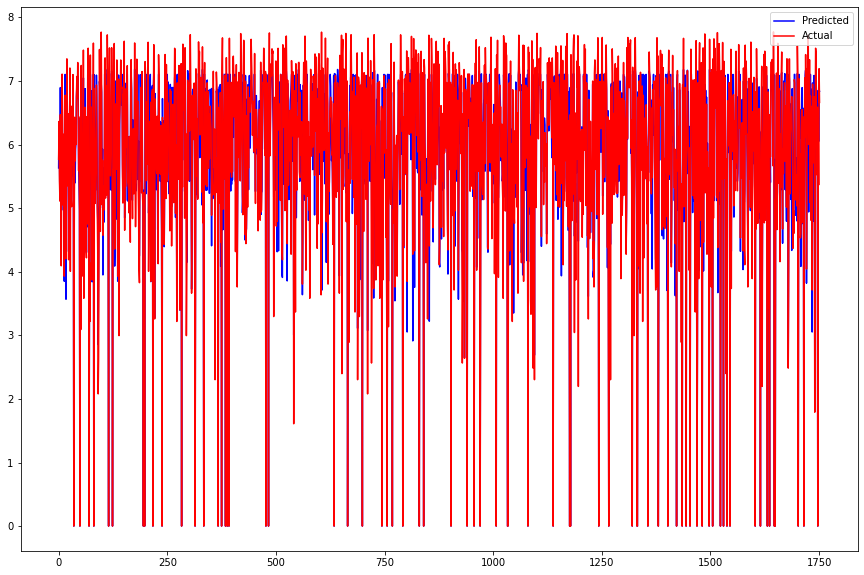

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_grid_RFtree_pred, color='Blue')
plt.plot(np.array(y_test), color='Red')
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV in Random Forest since we have huge dataset and it is good for huge and complex models where we just want to select random parameters from the bag of parameters. It reduces the processing and training time by taking the random subsets of the provided parameters wihout compromising the accuracy of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using RandomizedSearchCV with different hyperparameters we saw that their is not much significant improvement observed. Although MSE on test dataset has been reduced from 14 to 13.

### ML Model - 4 - **LightGBM Regression**

LightGBM Regression

In [ ]:
# import the regressor
from lightgbm import LGBMRegressor
  
# create a regressor object
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=4, learning_rate=0.1, n_estimators=500,  n_jobs=-1) 
  
# fit the regressor with X and Y data
lgbmR.fit(X_train, y_train)

# predict the model
y_train_lgbmR_pred= lgbmR.predict(X_train)
y_test_lgbmrR_pred= lgbmR.predict(X_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train, y_train_lgbmR_pred, y_test, y_test_lgbmrR_pred)

--------------------------------------------------
MAE on train is: 0.23342949452449055
MAE on test is: 0.3048302599563401
--------------------------------------------------
MSE on train is: 0.12473838416373527
MSE on test is: 0.23293809380559807
--------------------------------------------------
RMSE on train is: 0.35318321614104947
RMSE on test is: 0.4826366063671487
--------------------------------------------------
MAPE on train is: 2428245498310105.5  %
MAPE on test is: 4234148521970686.0  %
--------------------------------------------------
R2 on train is: 0.9479452586758801
R2 on test is: 0.9111008384850818
--------------------------------------------------
Adjusted R2 on train is : 0.9464151369438366
Adjusted R2 on test is : 0.9084876944076298
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Answer :** LightGBM is the lighter version of GBM. It has more faster and accurate than other popular gradient boosting libraries such as XGBoost on several datasets. We want improved further, so we have tried implimenting LightGBM in order to achieve more accurate results.

We saw that with the help of LightGBM we are able to capture 91% of the Variance of the dependent varibale with the help of independent variables(r2 score) for testing dataset.

We have further checked the performance metrics by hyperparameter tuning of LightGBM.

#### 2. Cross- Validation & Hyperparameter Tuning

LightGBM with RandomizedSearchCV

In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
lgbm= LGBMRegressor()

# Defining parameters
parameters={"learning_rate":[0.01,0.1],"max_depth":[3,4,5],"n_estimators":[500,600]}

# Train the model
lgbm_rand_R= RandomizedSearchCV(lgbm,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
lgbm_rand_R.fit(X_train,y_train)

# Predict the output
y_train_rand_lgbm_pred = lgbm_rand_R.predict(X_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lgbm_rand_R.best_params_}")
print(f"Negative mean square error is: {lgbm_rand_R.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best alpha value found out to be: {'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.1}
Negative mean square error is: -0.22013929204447244


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_rand_lgbm_pred,y_test,y_test_rand_lgbm_pred)

--------------------------------------------------
MAE on train is: 0.1928290325342585
MAE on test is: 0.2909136651448541
--------------------------------------------------
MSE on train is: 0.08390883880201805
MSE on test is: 0.220617819367707
--------------------------------------------------
RMSE on train is: 0.28967022422406147
RMSE on test is: 0.46969971190932935
--------------------------------------------------
MAPE on train is: 1860926717175949.2  %
MAPE on test is: 3553391562338390.5  %
--------------------------------------------------
R2 on train is: 0.9649838906610098
R2 on test is: 0.9158027833205893
--------------------------------------------------
Adjusted R2 on train is : 0.9639546105511041
Adjusted R2 on test is : 0.9133278504375966
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV was still the better option since it is taking very less processing time without compromising the accuracy. So we have mutually decided to use that hyperparameter optimization technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have tried different parameters for tuning of our LightGBM model and achieved 0.96 r2 score on training dataset, 0.91 on testing set as well that means our model is optimized and not falling under the underfitting or overfitting side. The best parameters obtained by the optimatization is {'n_estimators': [500, 600], 'max_depth': [3,4,5], 'learning_rate':[ 0.01,0.1]}.

### ML Model - 5 - **XGBoost Regression**

XGBoost Regression

In [ ]:
# import the regressor
from xgboost import XGBRegressor
  
# create a regressor object
xgbR = XGBRegressor(learning_rate=0.1, max_depth=5) 
  
# fit the regressor with X and Y data
xgbR.fit(X_train, y_train)

# predict the model
y_train_xgbR_pred= xgbR.predict(X_train)
y_test_xgbR_pred= xgbR.predict(X_test)

[08:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

--------------------------------------------------
MAE on train is: 0.2729868739671889
MAE on test is: 0.3180363091647386
--------------------------------------------------
MSE on train is: 0.1677008822731916
MSE on test is: 0.24715429484214355
--------------------------------------------------
RMSE on train is: 0.40951298181277673
RMSE on test is: 0.49714615038451576
--------------------------------------------------
MAPE on train is: 1406303965127895.5  %
MAPE on test is: 2169553822840642.2  %
--------------------------------------------------
R2 on train is: 0.9300165213371778
R2 on test is: 0.9056753267904118
--------------------------------------------------
Adjusted R2 on train is : 0.927959393804467
Adjusted R2 on test is : 0.9029027026513881
--------------------------------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Answer :** XGBoost (eXtreme Gradient Boosting) is a Gradiant boosting algorithm and very popular for achieving good accuracies. We have used XGBoost.


We got r2 score of 0.94 for testing dataset which is which is excelent and improved as well. At this point of time slightly improvement in MAPE can lead to huge profit to stakeholders and we were very curious and excited at his point of time to further improve the efficiency of our model and for this we have again decided to tune the various hyperparameters of xgboost.

#### 2. Cross- Validation & Hyperparameter Tuning

XGBoost with RandomizedSearchCV

In [ ]:

from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[4,5]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(X_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(X_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[08:40:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 5}
Negative mean square error is: -0.24587729932998417


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)

--------------------------------------------------
MAE on train is: 0.2729868739671889
MAE on test is: 0.3180363091647386
--------------------------------------------------
MSE on train is: 0.1677008822731916
MSE on test is: 0.24715429484214355
--------------------------------------------------
RMSE on train is: 0.40951298181277673
RMSE on test is: 0.49714615038451576
--------------------------------------------------
MAPE on train is: 1406303965127895.5  %
MAPE on test is: 2169553822840642.2  %
--------------------------------------------------
R2 on train is: 0.9300165213371778
R2 on test is: 0.9056753267904118
--------------------------------------------------
Adjusted R2 on train is : 0.927959393804467
Adjusted R2 on test is : 0.9029027026513881
--------------------------------------------------


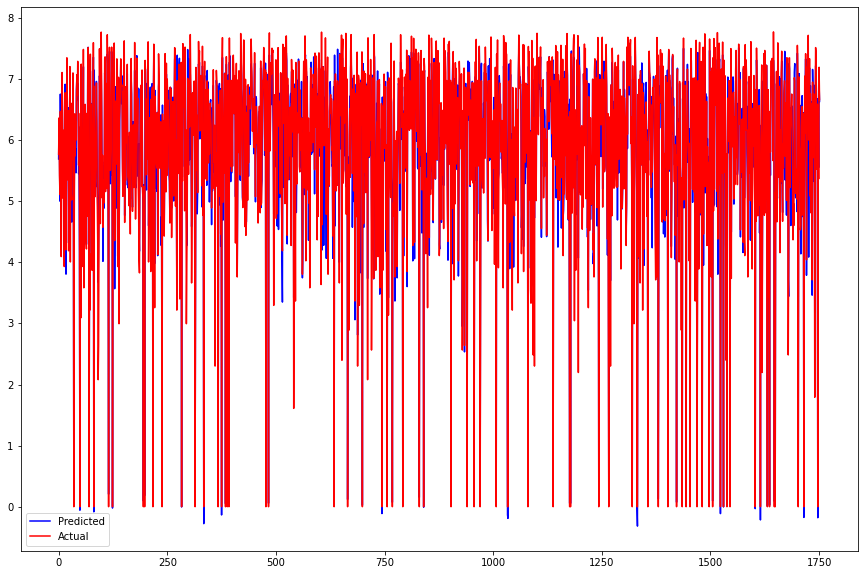

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_test_rand_xgbR_pred, color='Blue')
plt.plot(np.array(y_test), color='Red')
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Answer :** XGboost is a heavy algorithm and takes much processing time with GridSearchCV. So, tuning of hyperparameter with GridSearchCV was a bit complicated task for us. RandomizedSearchCV is excellent hyperparameter optimization technique for this senario. It can take variety of parameters and take the random possible combinations of hyperparameters. So we have used RandomizedSearchCV for hyperparameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have tried different parameters for tuning of our XG Boost model and achieved 0.93 r2 score on training dataset, 0.90 on testing set as well that means our model is optimized and not falling under the underfitting or overfitting side. The best parameters obtained by the optimatization is {'n_estimators': [500, 600], 'max_depth': [3,4,5], 'learning_rate':[ 0.01,0.1]}.

Minor improvement in regresson metrics are also significant now as we are moving towards model perfection. With the help of RandomizedSearchCV we got the r2 score of 0.94 (Now 94% of the variance of test set our model is capturing) for test dataset which is 1% higher than without RandomizedSearchCV and the best parameters found out to be{'learning_rate': 0.1, 'max_depth': 13}.
Also we have noticed that our MAPE is further reduced and falling under 3% (Minimum error among all models) and on the other hand MSE is also reduced to 12%. We have also seen that on further increasing the max_depth of tree our model is overfitting so above values of parameters are the best combinations.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since predicting sales over a period of time falls under the category of "Time series data" and there are following regression metrics that are required as per our goal of analysis (Predicting future Sales):

1. MAE(Mean Absolute Error): This metric calculates the average magnitude of the errors in the predictions, without considering their direction. It has the inverse relation with the accuracy of the model. In regression analysis our aim is to minimise the MAE and ultimately this will create positive business impact.

2. RMSE(Root Mean Squared Error): It is the square root of MSE and this is the most widely use regression metric since it has the same units as the original data so it is easy to interpret the magnitude of error.

3. MAPE(Mean Absolute Percentage Error): It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. This metric is particularly useful when working with time series data(as in our case), as it allows for easy comparison of forecast accuracy across different scales. With the help of MAPE an analyst can easily explain the percentage error to the stakeholders. This metric is considered as one of the most important regression metric in time series data for a positive business impact.


4. R2_Score: R2 score(coefficient of determination) is a metric that is widely used in regression analysis because it measures the proportion of the variance in the dependent variable that is explained by the independent variables. R2 score allows analysts to quickly and easily evaluate the goodness of fit of a model and compare different models. It also provides a clear measure of how well the model is explaining the variance in the dependent variable, which can aid in making decisions about model selection and further analysis.

5. Adjudusted R2_Score: R2 score(coefficient of determination) is a metric that is widely used in regression analysis because it measures the proportion of the variance in the dependent variable that is explained by the independent variables. Adjusted R2 score allows analysts to quickly and easily evaluate the goodness of fit of a model and compare different models. It also provides a clear measure of how well the model is explaining the variance in the dependent variable, which can aid in making decisions about model selection and further analysis.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Linear_regression","Decision_tree","Random_forest","LightGBM","XGboost"]

r2_r = [.83,0.86,0.88,0.91,0.90]
adjusted_r2 = [.82,.86,.88,.90,.90]

# Create dataframe from the lists
data = {'Models': models, 
        'R2': r2_r,
        'Adjusted R2': adjusted_r2
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

Models    R2  Adjusted R2
0  Linear_regression  0.83         0.82
1      Decision_tree  0.86         0.86
2      Random_forest  0.88         0.88
3           LightGBM  0.91         0.90
4            XGboost  0.90         0.90

We have chosen **XGboost** as our final prediction model with hyperparameters {'learning_rate': 0.1, 'max_depth': 13} as it is very clear from above dataframe that it has given the highest accuracy (97%), least MAPE (3%) and maximum r2 score(0.94) on the testing dataset among all other models.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

Although tree based algorithm gives most accurate results but they have less explanability. With the help of some explanabilty tools like LIME and SHAP we can explain our model to the stakeholders.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project we have dataset that We started with loading the data and then we did Exploratory Data Analysis (EDA), on all the feature of our dataset then analysed our dependent variable ie “Ranted Bike count” and then transform it then null values treatment, feature selection, encoding of categorical columns, and analyse the numeric variable, check the correlation and drop the highly correlated variable and then inhot coding then build the model and extract statistical information that quite useful for the Business prespective

Next we have implemented machine learning algorithms like Linear Regression, Lasso, Ridge, Decision Tress, Random Forest, XGBoost . We did some hyperparameter tuning to improve our model performance. 

**Observation :**

*   In holiday or non-working days there is demands in rented bikes.

*   .There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

*   People prefered more rented bikes in the morning than the evening.

*   When the rainfall was less, people have booked more bikes except some few cases.

*   The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.



**Eveluation matrics**

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Linear_regression","Decision_tree","Random_forest","LightGBM","XGboost"]
R2_Score_train=[.81,.89,.91,.94,.93]
R2_score_test = [.83,0.86,0.88,0.91,0.90]
Adjusted_r2_train =[.80, .89,.91,.94,.92 ]
Adjusted_r2_test = [.82,.86,.88,.90,.90]

# Create dataframe from the lists
data = {'Models': models, 
        'R2 Score Train': R2_Score_train,
        'R2 Score Test' : R2_score_test,
        'Adjusted R2 Score Train': Adjusted_r2_train,
        'Adjusted R2 Score Test' :Adjusted_r2_test
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

Models  R2 Score Train  R2 Score Test  Adjusted R2 Score Train  \
0  Linear_regression            0.81           0.83                     0.80   
1      Decision_tree            0.89           0.86                     0.89   
2      Random_forest            0.91           0.88                     0.91   
3           LightGBM            0.94           0.91                     0.94   
4            XGboost            0.93           0.90                     0.92   

   Adjusted R2 Score Test  
0                    0.82  
1                    0.86  
2                    0.88  
3                    0.90  
4                    0.90

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***